<div>
Olá, Rafael!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor v1</b> <a class="tocSkip"></a>
    
Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto está excelente, muito bem organizado e com análises interessantes. Abaixo, destaco alguns pontos positivos do seu projeto:
    
- Código bem simples e estruturado usando funções
- Comentários sucintos e bem objetivos
- Conclusões pertinentes em cada análise e etapa de avaliação
- Análises bem detalhadas em cada etapa do projeto
- Uso adequado de gráficos e estatísticas descritivas
    
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**
    
</div>


<div class="alert alert-block alert-success">
<b> Comentário geral do revisor v2</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão do seu trabalho ficou muito melhor! Espero que as sugestões sejam relevantes para projetos futuros.
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
    
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>


## Etapa 1 - Carregamento dos Dados:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

df_games = pd.read_csv('datasets/games.csv')

In [3]:
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os dados foram carregados corretamente
- Os métodos `info()` e `sample()` foram utilizados para estudo inicial dos dados
- Dica: Poderia também usar o método `describe()` para calcular as estatísticas dos dados
</div>

## Etapa 2 - Preparação dos Dados:

* Transformar todos os nomes das colunas em minúsculas;
* Converter todos os dados string do dataframe para minúsculas;
* Verificar a existência de dados em duplicidade;
* Verificar valores nulos;
* Tratar dados nulos da coluna 'Year_of_Release' e transformar em inteiros;
* Tratar dados nulos da coluna 'User_score' e transformar em float;
* Tratar dados nulos da coluna 'Critic_Score';
* Tratar dados nulos da coluna 'Rating';
* Tratar dados nulos da coluna "Name".
* Padronização do Rating ESRB

### Transformar todos os nomes das colunas e dados string em minúsculas

In [5]:
# Transformar todos os nomes das colunas em minúsculas
df_games.columns = df_games.columns.str.lower()

# Converter todos os dados da coluna para minúsculas
for column in df_games.columns:
    if df_games[column].dtype == 'object':
        df_games[column] = df_games[column].str.lower()
         
df_games.head()

# Definir as colunas para verificar os valores nulos
columns_to_check = ['year_of_release', 'critic_score', 'user_score', 'rating']


def count_missing_values(df, columns):
    """
    Função para contar valores nulos em colunas específicas de um DataFrame.
    """
    missing_values_count = {}
    for column in columns:
        missing_values_count[column] = df[column].isnull().sum()
    return missing_values_count


def count_print():
    """
    Função para contar valores nulos e imprimir resultados
    """
    # Contar os valores nulos nas colunas especificadas
    missing_values_count = count_missing_values(df_games, columns_to_check)

    # Imprimir os resultados
    for column, count in missing_values_count.items():
        print(f"Quantidade de valores nulos na coluna '{column}': {count}")


def test_mean_median():
    """
    Função para testar média e mediana
    """
    # Verificar média e mediana da coluna 'critic_score'
    media_critic_score = df_games['critic_score'].mean()
    mediana_critic_score = df_games['critic_score'].median()

    # Verificar média e mediana da coluna 'user_score'
    media_user_score = df_games['user_score'].mean()
    mediana_user_score = df_games['user_score'].median()

    # Imprimir os resultados
    print("Média da critic_score:", media_critic_score)
    print("Mediana da critic_score:", mediana_critic_score)
    print()
    print("Média da user_score:", media_user_score)
    print("Mediana da user_score:", mediana_user_score)
    

def plot_histograms(df, platforms_dict, year_range):
    """
    Cria histogramas sobrepostos para as plataformas especificadas dentro do intervalo de anos fornecido.
    """
    # Criando os subplots
    fig, axes = plt.subplots(1, len(platforms_dict), figsize=(18, 6))

    for ax, (manufacturer, platforms) in zip(axes, platforms_dict.items()):
        # Filtrando os dados para as plataformas e o intervalo de anos especificados
        df_filtered = df[(df['platform'].isin(platforms)) & 
                         (df['year_of_release'] >= year_range[0]) & 
                         (df['year_of_release'] <= year_range[1])]

        # Criando o histograma sobreposto
        for platform in platforms:
            ax.hist(df_filtered[df_filtered['platform'] == platform]['year_of_release'],
                     bins=range(year_range[0], year_range[1] + 1), alpha=0.5, label=platform, align='left')
        
        ax.set_title(manufacturer)
        ax.set_xlabel('Ano')
        ax.set_ylabel('Quantidade de Linhas')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()
    
    
def map_manufacturer(platform):
    for manufacturer, platforms in platforms_dict.items():
        if platform in platforms:
            return manufacturer
    return 'Other'

    
platforms_dict = {
    'Sony': ['ps', 'ps2', 'ps3', 'psp'],
    'Nintendo': ['wii', 'ds', 'gba', '3ds', 'snes'],
    'Microsoft': ['x360', 'xb']
}

country_dict = {
                'Sony': 'Japão',
                'Nintendo': 'Japão',
                'Microsoft': 'EUA'
            }


# Definindo o intervalo de anos
year_range = (1995, 2017)


def calculate_and_print_correlations_by_genres(df, genres):
    for genre in genres:
        # Filtrar os dados para incluir apenas os jogos do gênero especificado e criar uma cópia
        genre_games = df[df['genre'] == genre].copy()

        # Criar uma nova coluna indicando se o jogo possui uma determinada classificação de 'rating'
        for rating_value in genre_games['rating'].unique():
            if rating_value != 'n/d':
                genre_games[f'rating_{rating_value}'] = genre_games['rating'].apply(lambda x: 1 if x == rating_value else 0)

        # Calcular a correlação entre 'total_sales' e cada nova coluna de classificação de 'rating'
        correlations = {}
        for rating_value in genre_games['rating'].unique():
            if rating_value != 'n/d':
                correlation = genre_games['total_sales'].corr(genre_games[f'rating_{rating_value}'])
                correlations[rating_value] = correlation

        # Imprimir as correlações para o gênero atual
        print(f"Correlação entre 'total_sales' e cada item da coluna 'rating' (exceto 'n/d') para jogos do gênero '{genre}':")
        for rating_value, correlation in correlations.items():
            print(f"{rating_value}: {correlation}")
        print()  # Adiciona uma linha em branco entre os gêneros
        

def top_platforms_sales(df, region_sales, valid_regions):
    """
    Esta função recebe um DataFrame contendo informações de vendas de jogos, uma string representando a região de vendas e uma lista de regiões de vendas válidas.
    Retorna um DataFrame com as cinco principais plataformas com base nas vendas na região especificada.
    """
    if region_sales not in valid_regions:
        raise ValueError(f"Região de vendas inválida. Escolha entre {', '.join(valid_regions)}.")

    top_platforms = df.groupby('platform')[region_sales].sum().nlargest(5)
    
    return top_platforms

def generate_and_plot_sales_data(df_games, valid_regions):
    """
    Esta função gera e imprime os gráficos de barras e de pizza das cinco principais plataformas de vendas para cada região especificada na lista de regiões de vendas válidas.
    """
    # Determinar a quantidade de regiões válidas
    num_regions = len(valid_regions)
    
    # Paleta de cores pastel
    pastel_palette = sns.color_palette("pastel", num_regions)
    
    # Criar uma figura para os gráficos
    fig, axs = plt.subplots(4, num_regions, figsize=(6 * num_regions, 24))
    
    # Cores para os gráficos de pizza
    pie_colors = sns.color_palette("pastel", 5)
    
    # Iterar sobre as regiões de vendas
    for i, region in enumerate(valid_regions):
        if region in df_games.columns:
            # Obter os dados das vendas das principais plataformas
            top_platforms_data = top_platforms_sales(df_games, region, valid_regions)
            
            # Plotar o gráfico de barras para esta região (vendas absolutas)
            axs[0, i].bar(top_platforms_data.index, top_platforms_data.values, color=pastel_palette[i])
            axs[0, i].set_title(f"Top 5 Plataformas em {region.upper().replace('_', ' ')}")
            axs[0, i].set_ylabel("Vendas")
            axs[0, i].set_xlabel("Plataforma")
            axs[0, i].tick_params(axis='x', rotation=45)
            
            # Calcular percentuais de cota de mercado
            total_sales = df_games[region].sum()
            market_shares = (top_platforms_data / total_sales) * 100
            
            # Plotar o gráfico de pizza para esta região (percentuais)
            axs[1, i].pie(market_shares, labels=market_shares.index, autopct='%1.1f%%', colors=pie_colors)
            axs[1, i].set_title(f"Cota de Mercado entre as Top 5 de vendas em {region.upper().replace('_', ' ')}")
            
            # Inverter o dicionário para ter uma associação plataforma -> fabricante
            platform_to_manufacturer = {platform: manufacturer for manufacturer, platforms in platforms_dict.items() for platform in platforms}

            # Calcular as vendas totais por fabricante para esta região
            df_games['manufacturer'] = df_games['platform'].apply(lambda platform: platform_to_manufacturer.get(platform, 'Outros'))
            manufacturer_sales = df_games.groupby('manufacturer')[region].sum()  # Use 'region' ou outra coluna adequada

            # Plotar o gráfico de pizza para participação de mercado por fabricante para esta região
            axs[2, i].pie(manufacturer_sales, labels=manufacturer_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel", len(manufacturer_sales)))
            axs[2, i].set_title(f"Participação de Mercado por Fabricante em {region.upper().replace('_', ' ')}")

            # Calcular as vendas totais por país para esta região
            df_games['country'] = df_games['manufacturer'].apply(lambda manufacturer: country_dict.get(manufacturer, 'Outros'))
            country_sales = df_games.groupby('country')[region].sum()

            # Plotar o gráfico de pizza para participação de mercado por país para esta região
            axs[3, i].pie(country_sales, labels=country_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel", len(country_sales)))
            axs[3, i].set_title(f"Participação de Mercado por País de Origem do Fabriante {region.upper().replace('_', ' ')}")
        else:
            print(f"A região de vendas '{region}' não é uma coluna válida no DataFrame.")
            # Remover os subplots para esta região
            fig.delaxes(axs[0, i])
            fig.delaxes(axs[1, i])
            fig.delaxes(axs[2, i])
            fig.delaxes(axs[3, i])
    
    plt.tight_layout()
    plt.show()
    

def top_genres_by_region(df, region_sales, valid_regions):
    """
    Esta função recebe um DataFrame contendo informações de vendas de jogos, uma string representando a região de vendas e uma lista de regiões de vendas válidas.
    Retorna uma figura que contém gráficos de barras e tabelas percentuais para os cinco principais gêneros de jogos por região de vendas especificada.
    """
    valid_regions_found = [region for region in valid_regions if region in df.columns]
    
    num_regions = len(valid_regions_found)
    fig, axs = plt.subplots(1, num_regions, figsize=(6 * num_regions, 6))
    
    # Paleta de cores pastel
    pastel_palette = sns.color_palette("pastel", num_regions)
    
    for i, region in enumerate(valid_regions_found):
        # Calcular os gêneros mais populares
        top_genres = df.groupby('genre')[region].sum().nlargest(5)
        ax = axs[i]
        
        # Gráfico de barras
        ax.bar(top_genres.index, top_genres.values, color=pastel_palette[i])
        ax.set_title(f"Top 5 Gêneros na {region.upper()}")
        ax.set_xlabel("Gênero")
        ax.set_ylabel("Vendas")
        ax.tick_params(axis='x', rotation=45)
        
        # Tabela percentual
        total_sales = df[region].sum()
        percentual_sales = (top_genres / total_sales) * 100
        table_data = pd.DataFrame({'Gênero': top_genres.index, 'Percentual de Vendas': percentual_sales})
        print(f"Tabela de Percentual de Vendas na {region.upper()}:\n{table_data}\n")
    
    plt.tight_layout()
    plt.show()
    

def top_ratings_by_region(df, region_sales, valid_regions):
    """
    Esta função recebe um DataFrame contendo informações de vendas de jogos, uma string representando a região de vendas e uma lista de regiões de vendas válidas.
    Retorna uma figura que contém gráficos de barras e tabelas percentuais para os cinco principais ratings por região de vendas especificada.
    """
    valid_regions_found = [region for region in valid_regions if region in df.columns]
    
    num_regions = len(valid_regions_found)
    fig, axs = plt.subplots(1, num_regions, figsize=(6 * num_regions, 6))
    
    # Paleta de cores pastel
    pastel_palette = sns.color_palette("pastel", num_regions)
    
    for i, region in enumerate(valid_regions_found):
        # Remover os valores 'n/d'
        df_filtered = df[df['rating'] != 'n/d']
        
        # Calcular os ratings mais populares
        top_ratings = df_filtered.groupby('rating')[region].sum().nlargest(5)
        ax = axs[i]
        
        # Gráfico de barras
        ax.bar(top_ratings.index, top_ratings.values, color=pastel_palette[i])
        ax.set_title(f"Top 5 Ratings na {region.upper()}")
        ax.set_xlabel("Rating")
        ax.set_ylabel("Vendas")
        ax.tick_params(axis='x', rotation=45)
        
        # Tabela percentual
        total_sales = df_filtered[region].sum()
        percentual_sales = (top_ratings / total_sales) * 100
        table_data = pd.DataFrame({'Rating': top_ratings.index, 'Percentual de Vendas': percentual_sales})
        print(f"Tabela de Percentual de Vendas na {region.upper()}:\n{table_data}\n")
    
    plt.tight_layout()
    plt.show()

### Verificar dados em duplicidade

In [6]:
# Verificar duplicadas
duplicadas = df_games.duplicated()

# Contar o número de linhas duplicadas
print("Número de linhas duplicadas:", duplicadas.sum())

Número de linhas duplicadas: 0


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os valores duplicados foram verificados
</div>

### Verificar valores nulos

In [7]:
# Filtrar e mostrar somente os valores nulos das colunas utlizando a função count_print()
count_print()
print()

# Contar quantas linhas contêm 'tbd' na coluna 'user_score'
count_tbd_user_score = df_games['user_score'].str.contains('tbd', case=False, na=False).sum()
print("Quantidade de linhas com 'tbd' na coluna 'user_score':", count_tbd_user_score)

Quantidade de valores nulos na coluna 'year_of_release': 269
Quantidade de valores nulos na coluna 'critic_score': 8578
Quantidade de valores nulos na coluna 'user_score': 6701
Quantidade de valores nulos na coluna 'rating': 6766

Quantidade de linhas com 'tbd' na coluna 'user_score': 2424


### Tratar dados nulos da coluna 'Year_of_Release' e transformar em inteiros

In [8]:
# Preencher os dados nulos na coluna 'year_of_release' com o número 0
df_games['year_of_release'].fillna(0, inplace=True)

# Converter os dados da coluna 'year_of_release' para inteiros
df_games['year_of_release'] = df_games['year_of_release'].astype(int)

df_games.head()

C:\Users\rafa_\AppData\Local\Temp\ipykernel_2548\1280247695.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_games['year_of_release'].fillna(0, inplace=True)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Conclusão:**
* Dados nulos da coluna 'years_of_release' foram padronizados com o número 0 (zero) por não ser necessário nenhum cálculo efetivo destes valores como média ou mediana.
* Tipo de dado alterado para Inteiro.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os tipos de dados foram convertidos
- As justificativas foram apresentadas
</div>

### Tratar dados das colunas 'User_Score' e 'Critic_Score'

#### Converter dados de  'User_Score' para float:

In [9]:
# Converter dados da coluna 'user_score' para números float
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
df_games.info()
print()

# Exemplo de linha com informação de 'tdb' em 'user_score' que foi alterada para Nulo
print(df_games.iloc[10238])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB

name               invizimals: the lost tribes
platform                                   psp
year_of_release                           2011
genre                                   action
na_sales                                  

#### Testar resultado de médias e medianas com valores não nulos:

In [10]:
# Chamar função de teste
test_mean_median()

Média da critic_score: 68.96767850559173
Mediana da critic_score: 71.0

Média da user_score: 7.125046113306982
Mediana da user_score: 7.5


#### Substituir valores pela mediana e retestar resultado de média e mediana com todos os valores:

In [11]:
median_critic_score = df_games['critic_score'].median(skipna=True)
median_user_score = df_games['user_score'].median(skipna=True)

# Substituir os valores nulos pela média
df_games['critic_score'].fillna(median_critic_score, inplace=True)
df_games['user_score'].fillna(median_user_score, inplace=True)

# Chamar função de teste
test_mean_median()

Média da critic_score: 70.01064911755908
Mediana da critic_score: 71.0

Média da user_score: 7.329739754711337
Mediana da user_score: 7.5


C:\Users\rafa_\AppData\Local\Temp\ipykernel_2548\2172735354.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_games['critic_score'].fillna(median_critic_score, inplace=True)
C:\Users\rafa_\AppData\Local\Temp\ipykernel_2548\2172735354.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

**Conclusão:**
* Dados contendo 'tbd' em 'user_score' foram transformados em dados nulos e posteriormente substituídos conforme indicatico abaixo;
* Por terem valores bem próximos de média e mediana nas colunas 'critic_score' e 'user_score', optei por substituir os valores nulos pela mediana em ambas, causando pouca distorção na média e mediana após a substituição dos dados.

### Tratar dados nulos da coluna 'Rating'

In [12]:
# Substituir os valores nulos na coluna 'rating' por 'N/D'
df_games['rating'].fillna('n/d', inplace=True)

# Filtrar e mostrar somente os valores nulos das colunas utlizando a função count_print()
count_print()

Quantidade de valores nulos na coluna 'year_of_release': 0
Quantidade de valores nulos na coluna 'critic_score': 0
Quantidade de valores nulos na coluna 'user_score': 0
Quantidade de valores nulos na coluna 'rating': 0


C:\Users\rafa_\AppData\Local\Temp\ipykernel_2548\239943831.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_games['rating'].fillna('n/d', inplace=True)


**Conclusão:**
* Valores nulos na coluna 'Rating' foram substituídos pela string 'n/d' (não determinado).

### Tratar dados nulos da coluna "Name"

In [13]:
df_games.dropna(subset=['name'], inplace=True)

df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


**Conclusão:**
* Havia apenas 2 (duas) linhas sem informação de nome que foram deletadas por serem irrelevantes comparadas ao total de linhas (16715) do dataframe.

### Padronização do Rating ESRB

In [14]:
# Substituir 'k-a' por 'e' e 'ao' por 'm' na coluna 'rating'
df_games['rating'] = df_games['rating'].replace({'k-a': 'e'})

* EC - Early Childhood (Primeira Infância). Adequado para crianças com 3 anos ou mais, não há nenhum conteúdo inapropriado. Por exemplo, Dora the Explorer, Dragon Tales.
* E - Adequado para todas as idades. O jogo não deverá conter quaisquer sons ou imagens que provavelmente assustariam crianças mais jovens. Nenhum palavrão deve ser usado. Por exemplo, Just Dance, FIFA.
* E 10+ - Adequado para crianças com 10 anos ou mais. Pode haver formas moderadas de violência e algumas cenas podem ser assustadoras para as crianças. Por exemplo, Minecraft Dungeons, Plants vs Zombies.
* T - Adequado para crianças com 13 anos ou mais. O jogo pode apresentar cenas de violência visuais e mais realistas. Por exemplo, Fortnite, Sims 4.
* M - Adequado para crianças com 17 anos ou mais. Esta classificação é usada quando a violência se torna realista e seria esperada na vida real. Palavrões, uso de tabaco, álcool ou drogas ilegais podem estar presentes. Por exemplo, Ark: Survival Evolved, Destiny 2.
* AO - Adequado para adultos com 18 anos ou mais. A classificação para adultos é usada quando existe um nível extremo de violência e matança sem motivação. A glamourização das drogas, jogos de azar e atividade sexual também podem estar presentes. Por exemplo, Grand Theft Auto V, Fallout 4.
* RP - Classificação Pendente. Títulos com a classificação RP ainda não têm determinada uma classificação ESRB final.

### Total de vendas para todas as regiões

In [15]:
# Criar a coluna "total_sales" somando as vendas de todas as regiões
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,71.0,7.5,n/d,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,71.0,7.5,n/d,31.38


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A coluna com as vendas totais foi criada
</div>

***Conclusão ETAPA 2:***

Após a etapa de transformação e preparação dos dados, realizamos uma padronização para que todas as informações estejam em minúsculas, tanto nos títulos das colunas quanto nos dados contidos no dataframe. Além disso, tratamos e manipulamos os dados nulos de acordo com as características de cada análise. Um aspecto relevante a ser destacado é a presença significativa de dados faltantes nas colunas de avaliação e classificação (rating), cujas razões precisam ser investigadas mais a fundo.

Diversos fatores podem contribuir para a ausência desses dados, como a data de lançamento, a região de lançamento ou até mesmo uma baixa divulgação do produto. No entanto, essa análise preliminar é apenas o ponto de partida, sendo necessário um exame mais aprofundado para compreender a natureza e a razão específica da falta dessas informações.

Ao realizar uma análise mais detalhada, podemos identificar padrões e correlações que nos ajudarão a determinar a presença ou ausência dos dados de avaliação e classificação, contribuindo assim para uma compreensão mais completa do conjunto de dados e embasando decisões futuras.


## Etapa 3 - Análise dos Dados:

### Lançamento de Jogos ano a ano

In [16]:
# Contando Jogos lançados por ano
unique_games_by_year = df_games.groupby('year_of_release')['name'].nunique().reset_index()
unique_games_by_year.columns = ['year_of_release', 'unique_items']

unique_games_by_year.head()

,year_of_release,unique_items
0,0,232
1,1980,9
2,1981,46
3,1982,36
4,1983,17


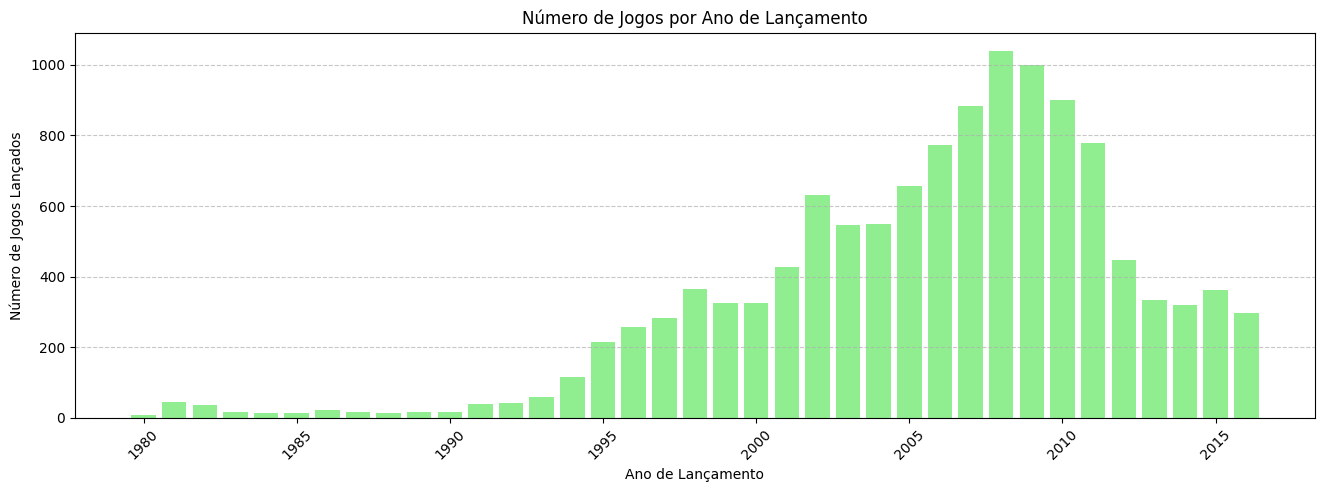

In [17]:
# Filtrando os anos onde o número de itens únicos é diferente de zero
unique_games_by_year_filtered = unique_games_by_year[unique_games_by_year['year_of_release'] != 0]

# Criando o gráfico de barras com outra cor pastel
plt.figure(figsize=(16, 5))
plt.bar(unique_games_by_year_filtered['year_of_release'], unique_games_by_year_filtered['unique_items'], color='lightgreen')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Jogos Lançados')
plt.title('Número de Jogos por Ano de Lançamento')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

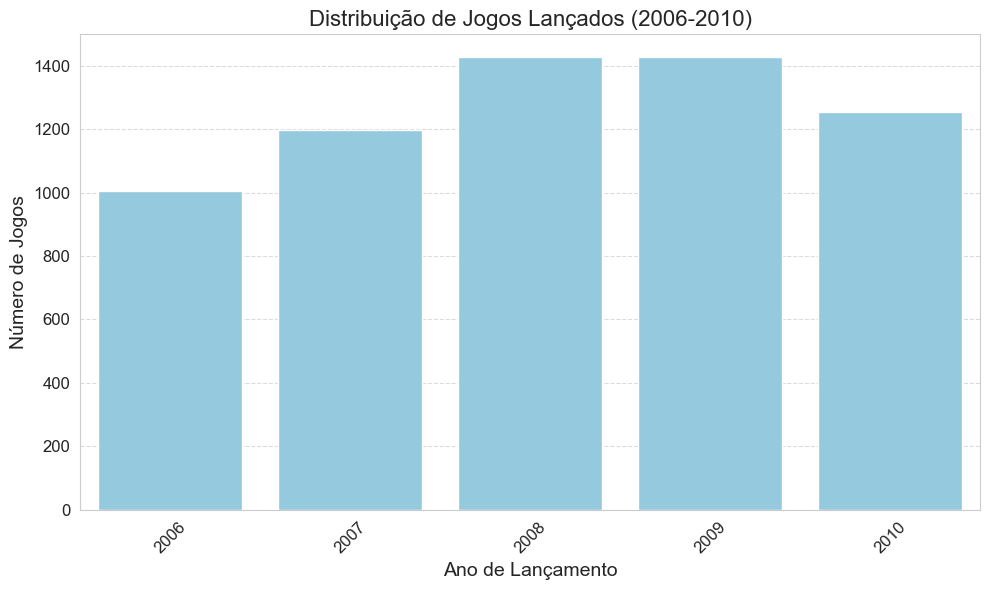

In [18]:
# Filtrar os dados para os anos de 2006 a 2010
filtered_data = df_games[(df_games['year_of_release'] >= 2006) & (df_games['year_of_release'] <= 2010)]

# Contar o número de jogos lançados em cada ano
year_counts = filtered_data['year_of_release'].value_counts().sort_index()

# Configuração do estilo do seaborn
sns.set_style("whitegrid")

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, color='skyblue')
plt.title('Distribuição de Jogos Lançados (2006-2010)', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=14)
plt.ylabel('Número de Jogos', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Análise**
* Podemos perceber que a partir de 1994 houve uma crescente oferta mundial de lançamento de jogos, tendo o seu pico em 2008 com mais me 1.000 lançamentos no ano.
* O período de maior concentração dos dados se dá entre 2006 e 2010 conforme detalhado no gráfico abaixo.
* A partir de 2009 percebemos uma queda acentuada nos lançamentos até 2012.
* De 2013 a 2016 (último ano dos dados fornecidos) a padrão de lançamento se manteve estável.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os dados históricos de lançamentos foram plotados corretamente
</div>


<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
    
* Período de maior concentração entre 2006 e 2010 (5 anos) filtrado e plotado em gráfico de barras.
</div>

### Variação de lançamentos por plataforma

#### Lançamentos totais

In [19]:
# Contar quantas vezes cada item aparece na coluna 'name'
platform_counts = df_games['platform'].value_counts()

# Criar um novo DataFrame com os valores únicos e suas contagens
df_platform_counts = pd.DataFrame(platform_counts.items(), columns=['platform', 'count'])

df_platform_counts.head()

,platform,count
0,ps2,2161
1,ds,2151
2,ps3,1331
3,wii,1320
4,x360,1262


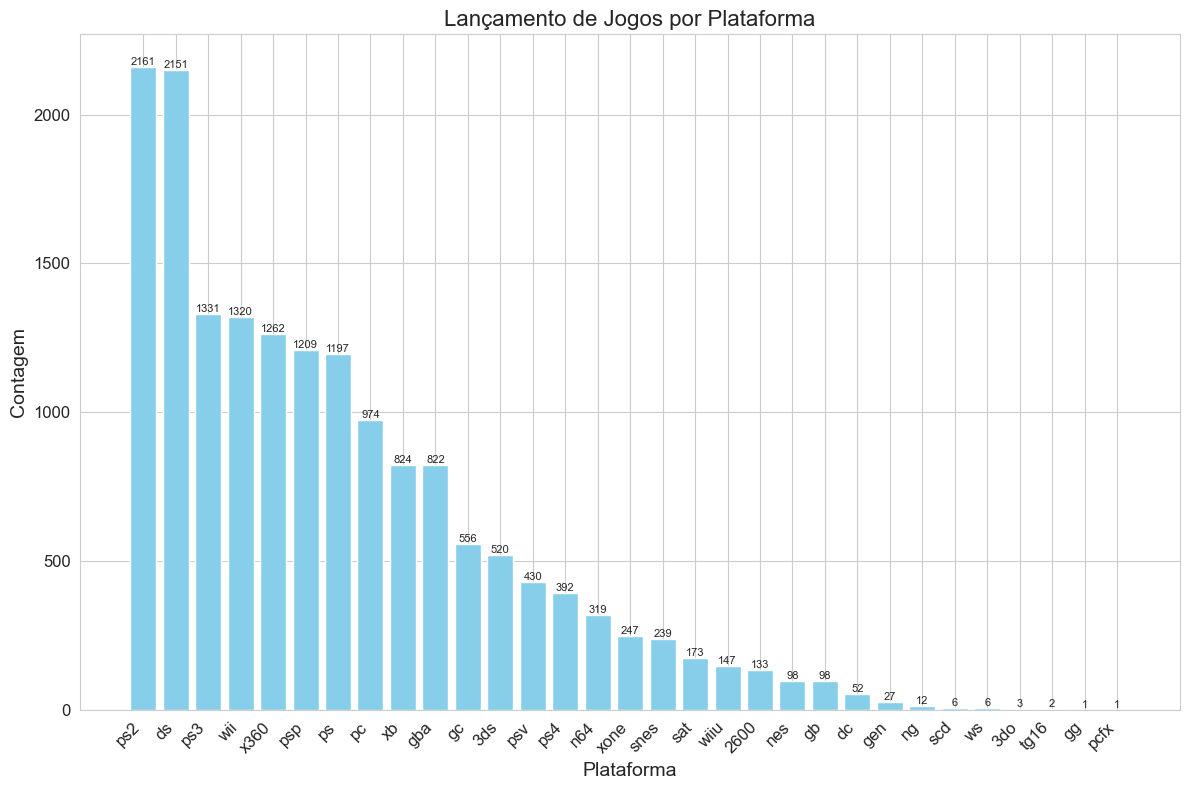

In [20]:
# Ordenar o DataFrame por contagem de plataformas
df_platform_counts_sorted = df_platform_counts.sort_values(by='count', ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(df_platform_counts_sorted['platform'], df_platform_counts_sorted['count'], color='skyblue')

plt.xlabel('Plataforma', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.title('Lançamento de Jogos por Plataforma', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.yticks(fontsize=12)

# Adicionar valores acima das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

**Análise**
* A plataforma 'ps2' liderou o ranking de lançamentos no período, seguida logo atrás pela plataforma 'ds';
* As plataformas 'ps3', 'wii', 'x360', 'psp', 'ps', 'pc', 'xb' e 'giga' fecham o ranking das 10 maiores.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os dados históricos de lançamentos por plataforma foram estudados
- As conclusões foram apresentadas
</div>


#### Total de Lançamento por plataforma ano a ano

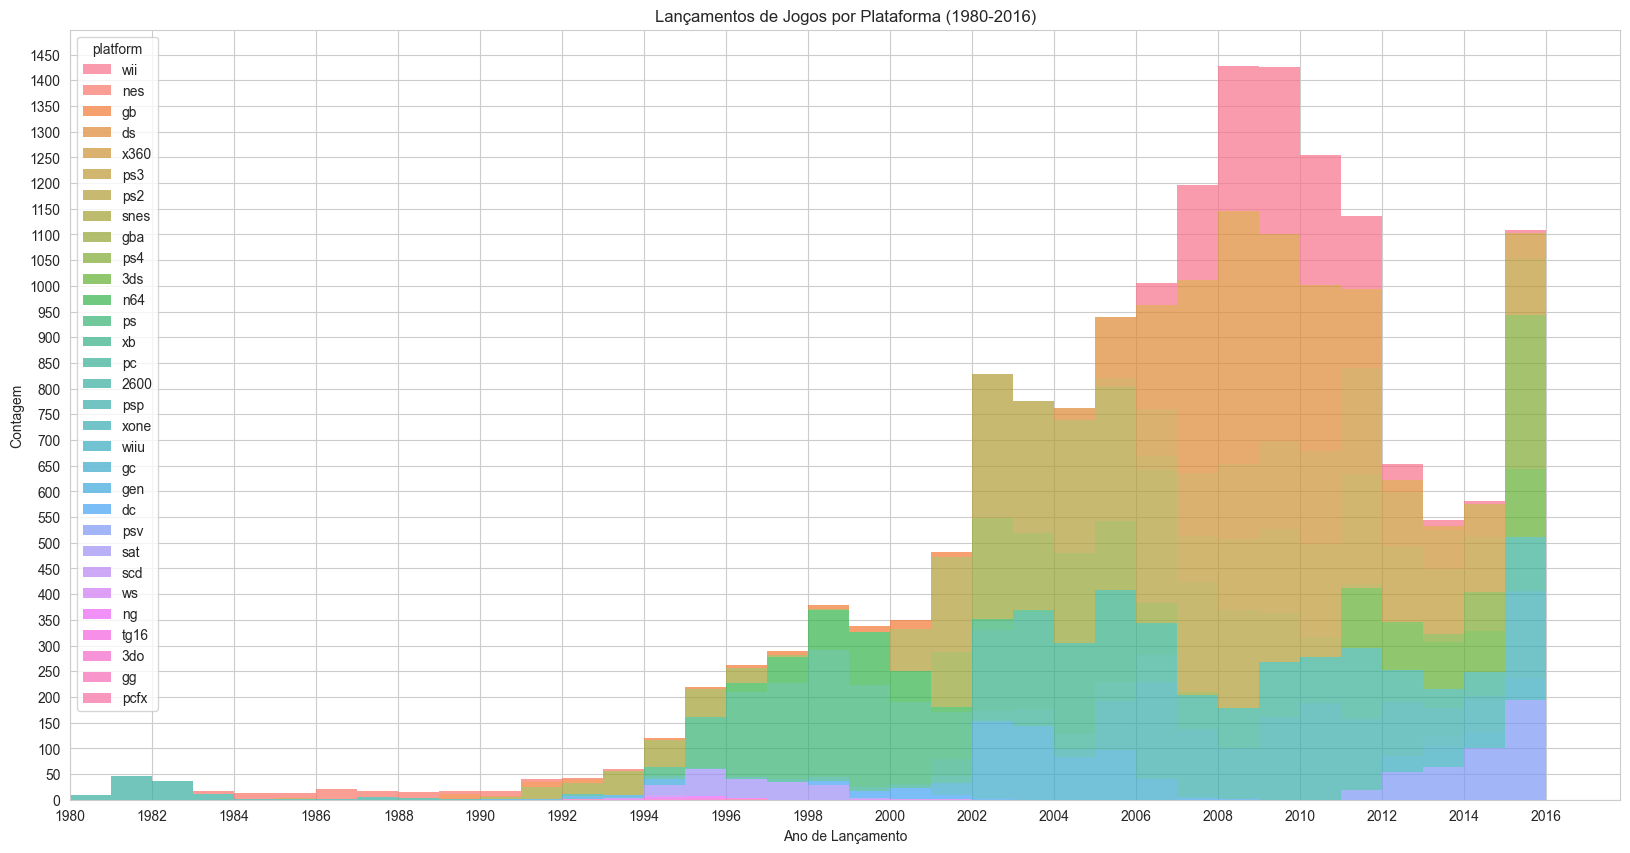

In [21]:
# Converter a coluna 'year_of_release' para valores inteiros
df_games['year_of_release'] = pd.to_numeric(df_games['year_of_release'], errors='coerce').fillna(0).astype(int)

# Filtrar linhas com valores diferentes de zero em 'year_of_release'
df_filtered = df_games[df_games['year_of_release'] != 0]

# Selecionar os 10 primeiros valores únicos da coluna 'platform'
top_10_platforms = df_filtered['platform'].value_counts().head(20).index

# Criar os histogramas por plataforma
plt.figure(figsize=(20, 10))
plt.subplot(1, 1, 1)
sns.histplot(data=df_filtered, 
             x='year_of_release', hue='platform', multiple='stack', bins=range(1980, 2017), kde=False, alpha=0.7, linewidth=0)
plt.title('Lançamentos de Jogos por Plataforma (1980-2016)')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Contagem')
plt.yticks(range(0, 1500, 50))  # Definir os ticks do eixo y
plt.xticks(range(1980, 2017, 2))  # Definir os ticks do eixo x a cada 2 anos
plt.xlim(1980) # Definir o limite inferior do eixo x para 1980

plt.show()

**Análise**
* Neste histograma podemos perceber um aumento na quantidade de lançamentos e o início de uma diverisficação maior de plataformas lançando jogos.
* Vemos também que já na década de 2000 houve um "boom" de lançamentos de jogos acompanhado pela maior quantidade de plataformas e concorrência.

In [22]:
# Criando a nova tabela separando os itens da coluna 'platform' por década
# Criando a nova coluna 'decade' com base no ano de lançamento
df_games['decade'] = (df_games['year_of_release'] // 10) * 10

# Filtrando as linhas que contêm 0 na coluna 'decade'
df_games_filtered = df_games[df_games['decade'] != 0]

# Criando a tabela pivot separando os itens da coluna 'platform' por década
platforms_by_decade = pd.pivot_table(df_games_filtered, index='decade', columns='platform', aggfunc='size', fill_value=0)

platforms_by_decade.head()

platform,2600,3do,3ds,dc,ds,gb,gba,gc,gen,gg,...,sat,scd,snes,tg16,wii,wiiu,ws,x360,xb,xone
decade,,,,,,,,,,,,,,,,,,,,,
1980,116,0,0,0,1,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1990,0,3,0,21,0,59,0,0,27,1,...,173,6,239,2,0,0,2,0,0,0
2000,0,0,0,31,1613,27,811,542,0,0,...,0,0,0,0,836,0,4,552,803,0
2010,0,0,512,0,507,0,0,0,0,0,...,0,0,0,0,450,147,0,680,0,247


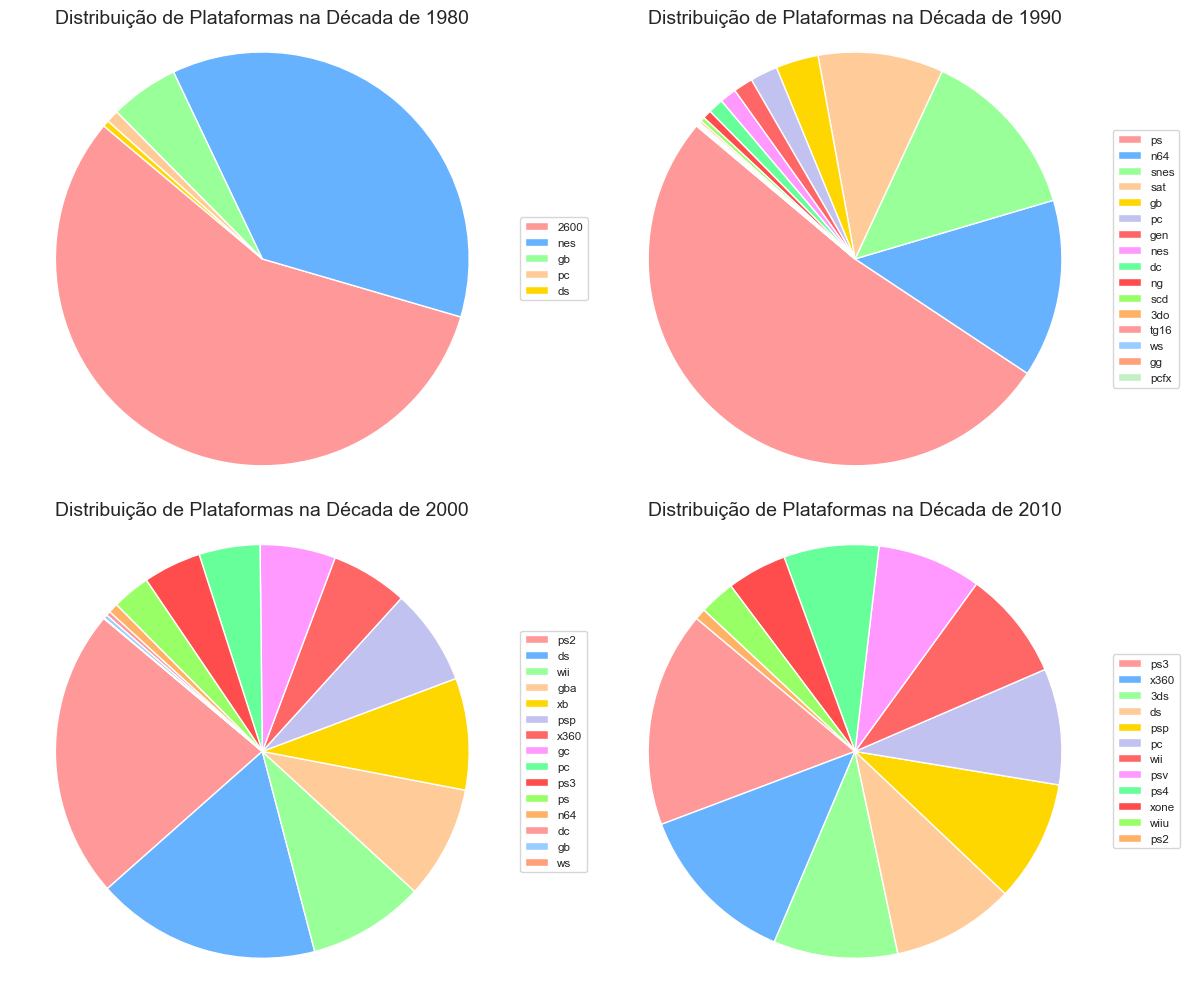

In [23]:
# Criar um dicionário para armazenar a contagem de cada plataforma por década
platform_counts_by_decade = {}

# Iterar sobre as décadas e contar a quantidade de cada plataforma
for decade in platforms_by_decade.index:
    platform_counts_by_decade[decade] = platforms_by_decade.loc[decade]

# Número total de décadas
total_decades = len(platform_counts_by_decade)

# Criando uma paleta de cores com tons pastel
colors_pastel = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#C2C2F0', '#FF6666', '#FF99FF', '#66FF99', '#FF4D4D',
                 '#99FF66', '#FFB266', '#FF9999', '#99CCFF', '#FFA07A', '#C2F0C2', '#FFCCCC', '#B2B2B2', '#FFB3E6', '#CCFF99']

# Contador para acompanhar a posição atual na matriz de subplot
plot_counter = 1

# Iterar sobre as contagens de plataformas por década e criar um gráfico de pizza para cada uma
for decade, counts in platform_counts_by_decade.items():
    plt.subplot(2, 2, plot_counter) # Criar um novo subplot na matriz 2x2
    non_zero_counts = counts[counts != 0] # Filtrar apenas os dados que não são zero
    pie_data = non_zero_counts.nlargest(20)  # Limitando para exibir no máximo 20 plataformas
    patches, _ = plt.pie(pie_data, startangle=140, colors=colors_pastel)
    plt.axis('equal')
    plt.title(f'Distribuição de Plataformas na Década de {decade}', fontsize=14)
    plt.legend(pie_data.index, loc="center left", bbox_to_anchor=(1, 0.5), fontsize='small')  # Ajustando a posição e o tamanho da legenda
    plot_counter += 1

plt.gcf().set_size_inches(12, 10)
plt.tight_layout()
plt.show()

**Análise**
* De acordo com a análise dos dados, podemos perceber que houve uma mudança bastante significativa a partir da década de 1990. Plataformas que antes lideravam na década de 1980 como a '2600' encerraram seu ciclo o mercado, enquanto outras plataformas começam a surgir com mais tecnologia e acesso.
* Uma observação importante é que ao longo do tempo, principalmente após a década de 1990, mais plataformas foram se consolidando e tornando cada vez mais equilibrada a concorrência no mercado. A evolução deste equilibrio podemos verificar analisando os gráficos década a década acima. 

#### As 10 Maiores Plataformas

In [24]:
# Lista das plataformas desejadas
platforms = ['ps2', 'ds', 'ps3', 'wii', 'x360', 'psp', 'ps', 'pc', 'xb', 'gba']

# Filtrar o DataFrame original para incluir apenas as plataformas desejadas
df_filtered_platforms = df_games[df_games['platform'].isin(platforms)]

# Exibir as primeiras linhas do novo DataFrame
df_filtered_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,decade
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54,2000
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52,2000
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77,2000
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,e,29.80,2000
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,e,28.91,2000


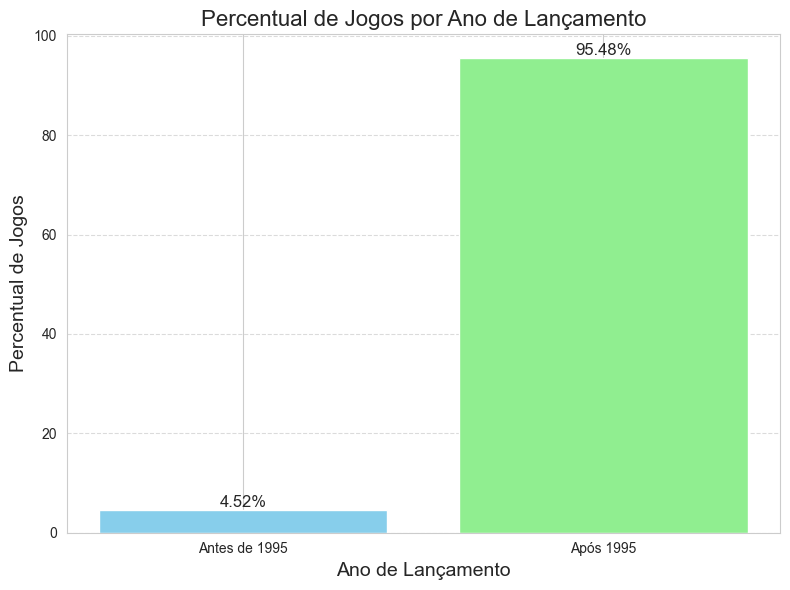

In [25]:
# Filtrar os dados para os anos antes e depois de 1990
before_1995 = df_games[df_games['year_of_release'] < 1995]
after_1995 = df_games[df_games['year_of_release'] >= 1995]

# Calcular o número total de jogos antes e depois de 1990
total_before_1995 = len(before_1995)
total_after_1995 = len(after_1995)

# Calcular percentuais
percent_before_1995 = total_before_1995 / len(df_games) * 100
percent_after_1995 = total_after_1995 / len(df_games) * 100

# Cores para as barras
colors = ['skyblue', 'lightgreen']

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))

bars = plt.bar(['Antes de 1995', 'Após 1995'], [percent_before_1995, percent_after_1995], color=colors)

plt.xlabel('Ano de Lançamento', fontsize=14)
plt.ylabel('Percentual de Jogos', fontsize=14)
plt.title('Percentual de Jogos por Ano de Lançamento', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar percentuais acima das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

**Análise**
* Conforme mostrado no gráfico, mais de 95% dos lançamentos de jogos foram feitos a partir de 1995.

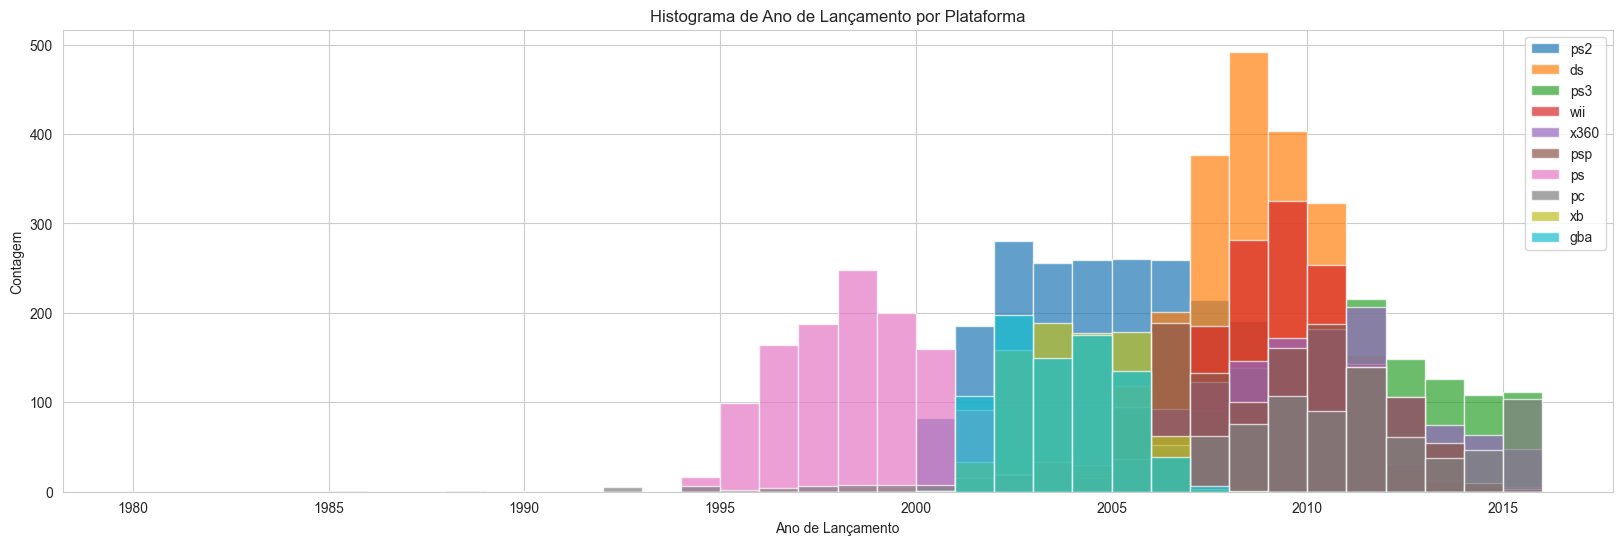

In [26]:
# Filtrar os dados para as plataformas desejadas
filtered_data = df_games[df_games['platform'].isin(platforms)]

# Plotar o histograma
plt.figure(figsize=(20, 6))
for platform in platforms:
    platform_data = filtered_data[filtered_data['platform'] == platform]
    plt.hist(platform_data['year_of_release'], bins=range(1980, 2017), alpha=0.7, label=platform)

plt.title('Histograma de Ano de Lançamento por Plataforma')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Contagem')
plt.legend()
plt.grid(True)
plt.show()

**Análise**
* Neste histograma geral, podemos confirmar a concentração de lançamentos de todas as maiores plataformas a partir de 1995, portanto concentraremos nossa análise entre 1995 e 2016.
* Para uma análise mais aprofundada, iremos verificar o histograma de cada plataforma individualmente.

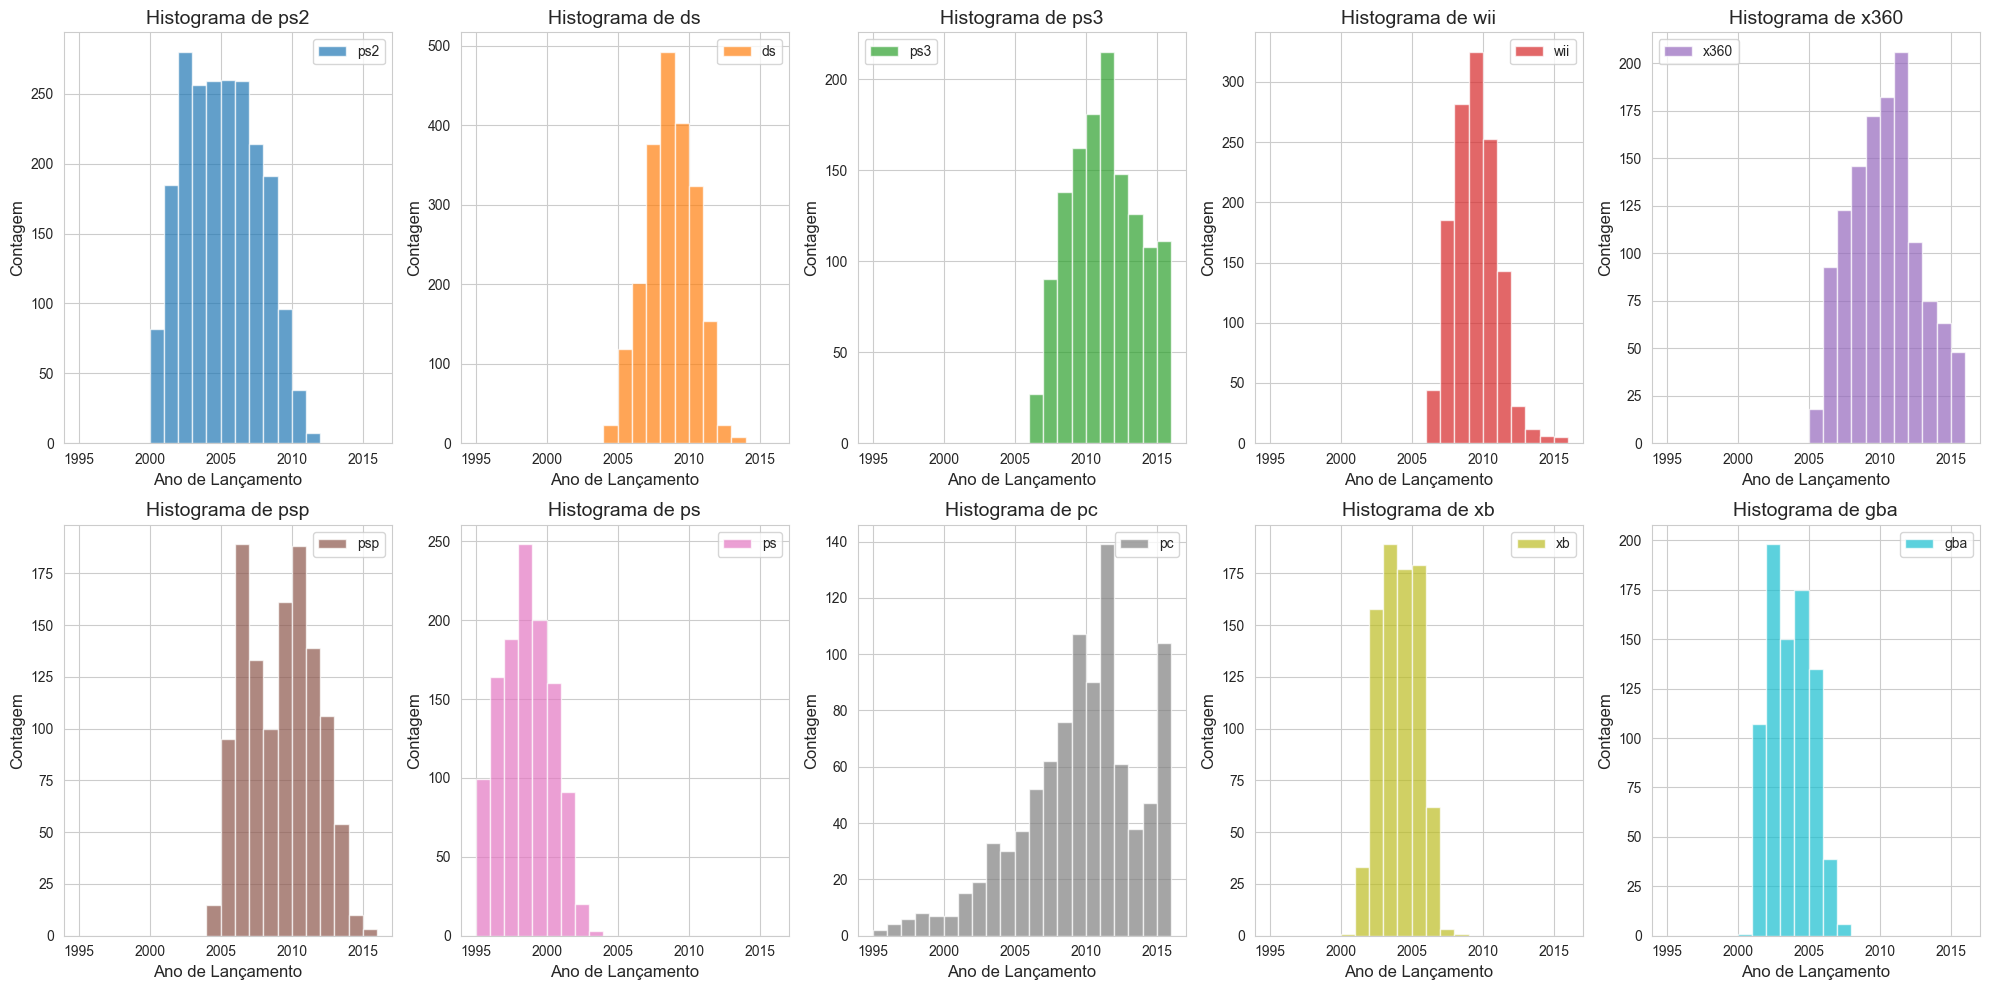

In [27]:
# Criar uma paleta de cores
palette = plt.get_cmap('tab10')

# Configurar a matriz de subplot
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Plotar os histogramas para cada plataforma
for i, platform in enumerate(platforms):
    row = i // 5
    col = i % 5
    platform_data = filtered_data[filtered_data['platform'] == platform]
    axs[row, col].hist(platform_data['year_of_release'], bins=range(1995, 2017), alpha=0.7, label=platform, color=palette(i))
    axs[row, col].set_title(f'Histograma de {platform}', fontsize=14)
    axs[row, col].set_xlabel('Ano de Lançamento', fontsize=12)
    axs[row, col].set_ylabel('Contagem', fontsize=12)
    axs[row, col].legend(fontsize=10)

plt.tight_layout()
plt.show()

**Análise**
* Na análise dos histogramas caso a caso, podemos identificar que existe um ciclo médio de duração em anos para as plataformas que dura em média 10 anos desde o seu surgimento, passando pelo auge e declínio.
* Uma exceção são os lançamentos para 'pc' que mantiveram um crescimento linear e prolongado ao longo de 20 anos.

In [28]:
df_games['manufacturer'] = df_games['platform'].map(map_manufacturer)
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,decade,manufacturer
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54,2000,Nintendo
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,71.0,7.5,n/d,40.24,1980,Other
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52,2000,Nintendo
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77,2000,Nintendo
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,71.0,7.5,n/d,31.38,1990,Other


#### Os Maiores Fabricantes

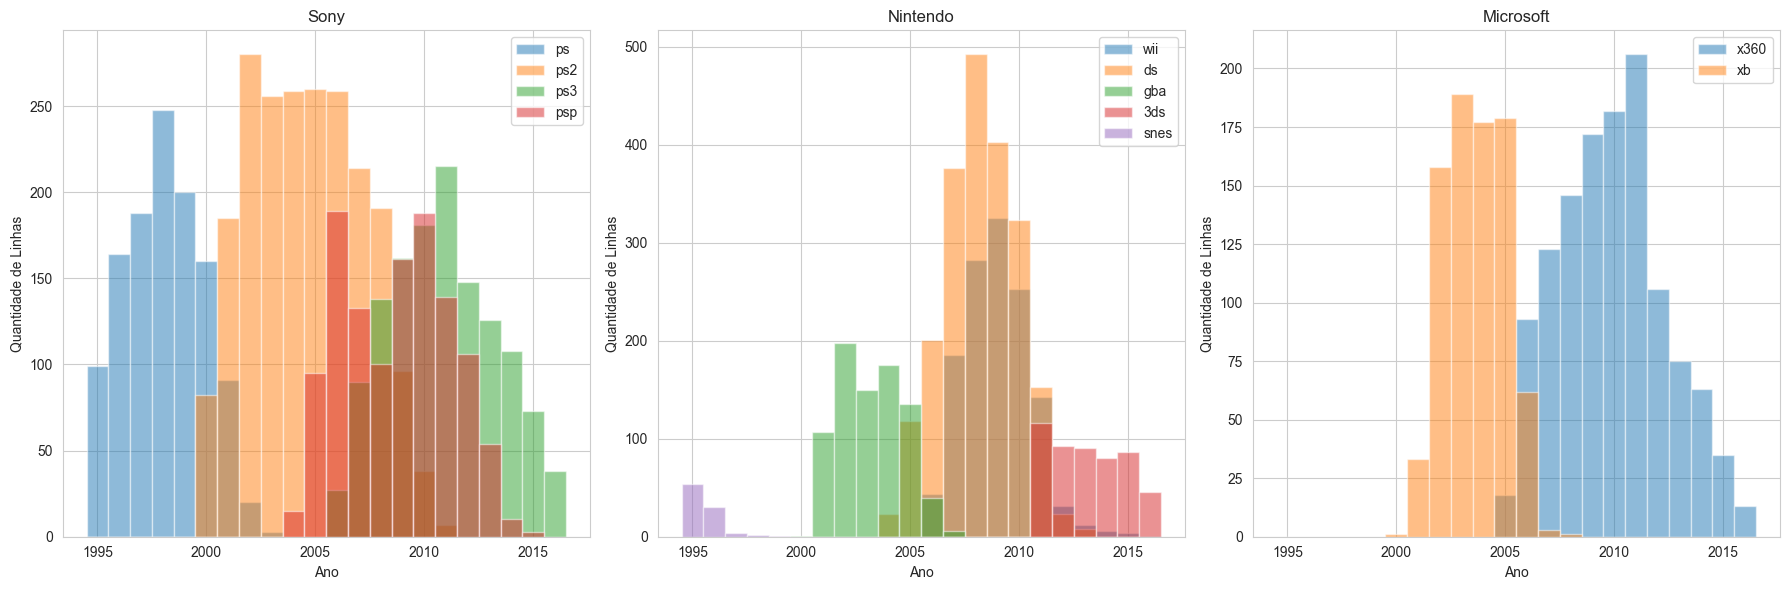

In [29]:
# Chamando a função para plotar os histogramas
plot_histograms(df_games, platforms_dict, year_range)

**Análise**
* Podemos perceber que três grandes fabricantes dominaram o mercado de jogos mundialmente neste período, são eles: Sony, Nintendo e Microsoft.
* Cada fabricante lançou ao menos duas plataformas ao longo dos anos devido a necessidade de adaptação às novas tecnologias sempre em evolução.
* Estas empresas conseguiram acompanhar a evolução e se mantiveram no mercado.

C:\Users\rafa_\AppData\Local\Temp\ipykernel_2548\1495208035.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='total_sales', y='platform', data=filtered_data, palette=colors)


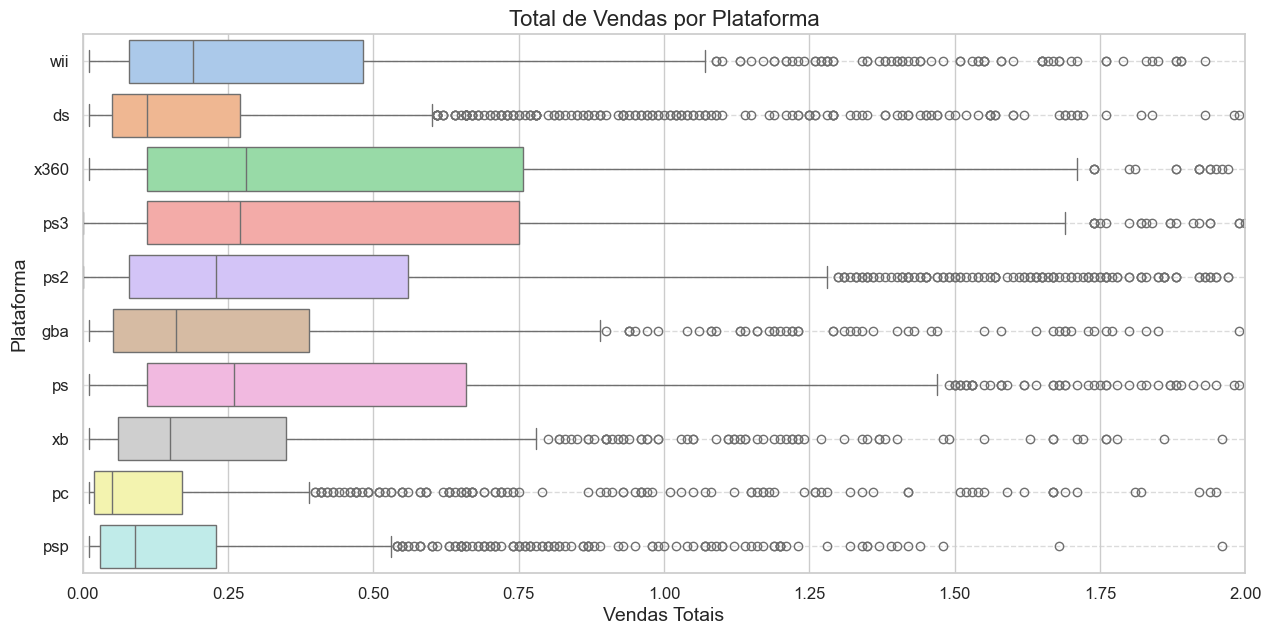

In [30]:
# Configurando o estilo e cores
sns.set(style="whitegrid")
colors = sns.color_palette("pastel")

# Criando o diagrama de caixa
plt.figure(figsize=(15, 7))
sns.boxplot(x='total_sales', y='platform', data=filtered_data, palette=colors)

# Ajustando título e rótulos dos eixos
plt.title('Total de Vendas por Plataforma', fontsize=16)
plt.xlabel('Vendas Totais', fontsize=14)
plt.ylabel('Plataforma', fontsize=14)

# Ajustando tamanho da fonte nos ticks dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Definindo o intervalo no eixo x
plt.xlim(0, 2)

# Removendo as linhas de grade horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

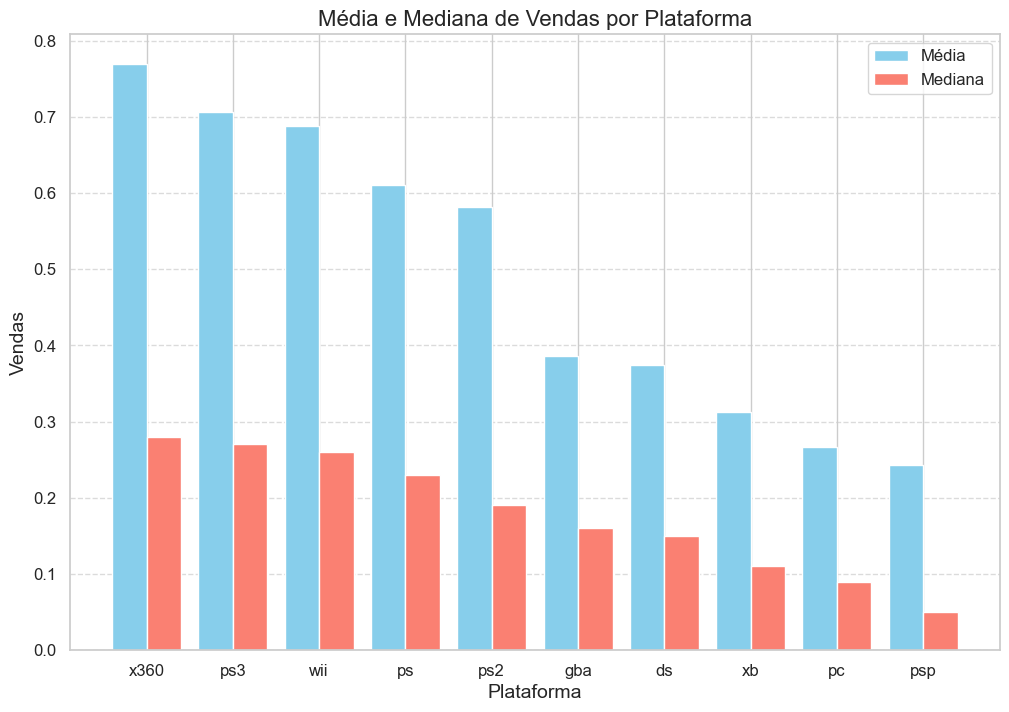

In [31]:
# Calculando a média para cada plataforma
platform_mean = filtered_data.groupby('platform')['total_sales'].mean().reset_index()

# Calculando a mediana para cada plataforma
platform_median = filtered_data.groupby('platform')['total_sales'].median().reset_index()

# Ordenando o DataFrame de média em ordem decrescente
platform_mean = platform_mean.sort_values(by='total_sales', ascending=False)

# Ordenando o DataFrame de mediana em ordem decrescente
platform_median = platform_median.sort_values(by='total_sales', ascending=False)

# Criando o gráfico de barras com as médias e medianas
plt.figure(figsize=(12, 8))

bar_width = 0.4
index = np.arange(len(platform_mean['platform']))

plt.bar(index, platform_mean['total_sales'], bar_width, color='skyblue', label='Média')
plt.bar(index + bar_width, platform_median['total_sales'], bar_width, color='salmon', label='Mediana')

plt.title('Média e Mediana de Vendas por Plataforma', fontsize=16)
plt.xlabel('Plataforma', fontsize=14)
plt.ylabel('Vendas', fontsize=14)

plt.xticks(index + bar_width / 2, platform_mean['platform'], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Análise**
* Analisando os diagramas de caixa e os valores demonstrados graficamente de média e mediana, observamos que há uma grande diferença nas vendas o que sugere que existe uma grande dispersão nos dados , ou seja, os valores estão espalhados por uma ampla faixa.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- As estatísticas descritivas de vendas por plataforma foram estudadas
- As conclusões foram apresentadas
</div>


### Análise de dispersão e correlação

#### Verificando a plataforma mais popular: 'PS2'

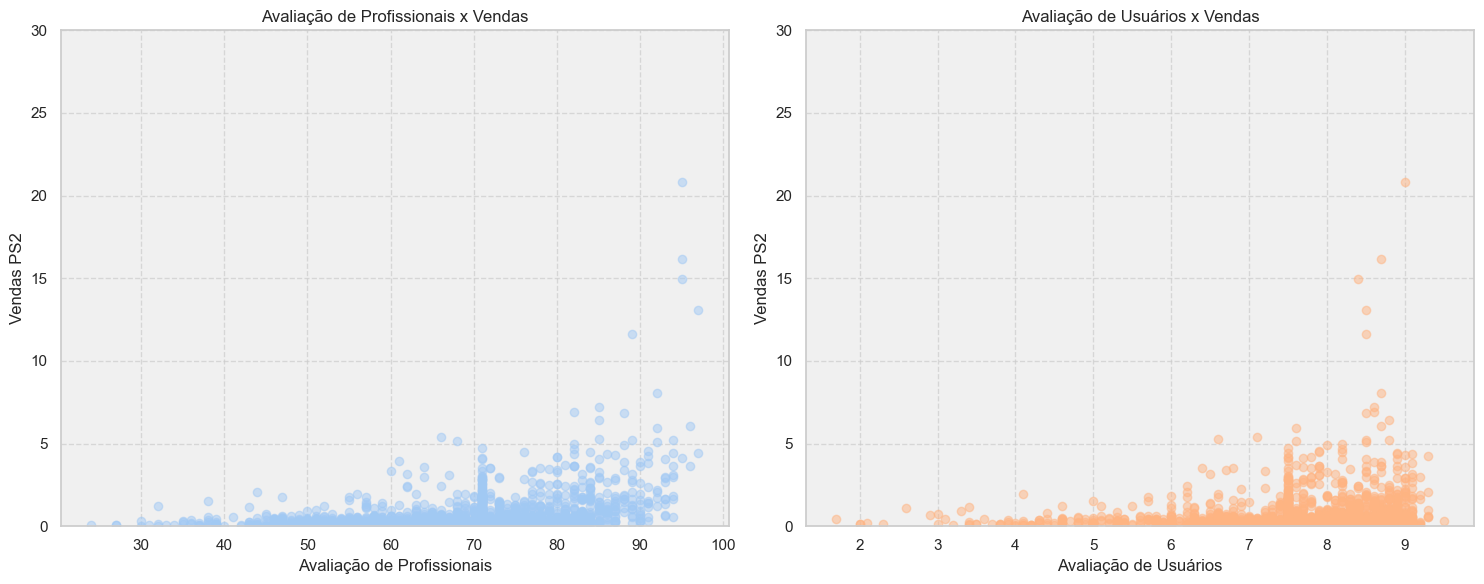

In [32]:
# Filtrar o dataframe para incluir apenas os dados da plataforma 'ps2'
df_ps2 = df_games[df_games['platform'] == 'ps2']

# Criar figura e eixos
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Para cada eixo, plotar gráfico de dispersão
for i, (score_column, color) in enumerate(zip(['critic_score', 'user_score'], colors)):
    axs[i].scatter(df_ps2[score_column], df_ps2['total_sales'], color=color, alpha=0.5)
    axs[i].set_xlabel('Avaliação de Profissionais' if score_column == 'critic_score' else 'Avaliação de Usuários')
    axs[i].set_ylabel('Vendas PS2')
    axs[i].set_title('Avaliação de Profissionais x Vendas' if score_column == 'critic_score' else 'Avaliação de Usuários x Vendas')
    axs[i].set_ylim(0, 30)  # Definindo o intervalo do eixo y
    axs[i].grid(True, linestyle='--', alpha=0.7)  # Adicionar uma grade mais sutil
    axs[i].set_facecolor('#f0f0f0')  # Adicionar um fundo cinza claro

plt.tight_layout()
plt.show()

In [33]:
# Calcular a correlação entre a avaliação dos profissionais e as vendas totais
corr_critic_sales_ps2 = np.corrcoef(df_ps2['critic_score'], df_ps2['total_sales'])[0, 1]

# Calcular a correlação entre a avaliação dos usuários e as vendas totais
corr_user_sales_ps2 = np.corrcoef(df_ps2['user_score'], df_ps2['total_sales'])[0, 1]

print("Correlação entre avaliação dos profissionais e vendas (ps2):", corr_critic_sales_ps2)
print("Correlação entre avaliação dos usuários e vendas (ps2):", corr_user_sales_ps2)


Correlação entre avaliação dos profissionais e vendas (ps2): 0.3454765724600362
Correlação entre avaliação dos usuários e vendas (ps2): 0.1748565837500128


**Análise**
* A correlação de 0.3455 entre a avaliação dos profissionais e as vendas totais sugere que há uma relação moderadamente positiva entre essas duas variáveis para os jogos da plataforma 'ps2'. Isso significa que, em geral, jogos com avaliações mais altas dos profissionais tendem a ter vendas mais altas, mas a relação não é extremamente forte.
* a correlação de 0.1749 entre a avaliação dos usuários e as vendas totais indica uma relação mais fraca entre essas duas variáveis. Isso sugere que as avaliações dos usuários têm uma influência menor nas vendas totais dos jogos da plataforma 'ps2'.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A correlação entre avaliações e vendas da plataforma mais popular foi estudada
- As conclusões foram apresentadas
</div>


#### Jogos para 'PS2' x Outras Plataformas

In [34]:
# Filtrar os jogos da plataforma 'ps2'
ps2_games = df_games[df_games['platform'] == 'ps2']

# Criar um DataFrame para armazenar os jogos presentes em outras plataformas
jogos_outras_plataformas = pd.DataFrame(columns=df_games.columns)

# Iterar sobre cada nome de jogo da plataforma 'ps2'
for game_name in ps2_games['name']:
    # Verificar se o nome do jogo está presente em outras plataformas
    outros_platformas = df_games[(df_games['name'] == game_name) & (df_games['platform'] != 'ps2')]
    
    # Se o jogo estiver presente em outras plataformas, adicionar à tabela de jogos em outras plataformas
    if not outros_platformas.empty:
        jogos_outras_plataformas = pd.concat([jogos_outras_plataformas, outros_platformas])

# Resetar os índices do DataFrame resultante
jogos_outras_plataformas.reset_index(drop=True, inplace=True)

jogos_outras_plataformas.head()

C:\Users\rafa_\AppData\Local\Temp\ipykernel_2548\4159266406.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  jogos_outras_plataformas = pd.concat([jogos_outras_plataformas, outros_platformas])


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,decade,manufacturer
0,grand theft auto: san andreas,xb,2005,action,1.26,0.61,0.0,0.09,93.0,8.6,ao,1.96,2000,Microsoft
1,grand theft auto: san andreas,pc,2005,action,0.00,0.93,0.0,0.04,93.0,8.9,m,0.97,2000,Other
2,grand theft auto: san andreas,x360,2008,action,0.08,0.02,0.0,0.01,71.0,7.5,m,0.11,2000,Microsoft
3,grand theft auto: vice city,pc,2003,action,0.00,0.03,0.0,0.01,94.0,8.8,m,0.04,2000,Other
4,grand theft auto iii,pc,2002,action,0.00,0.01,0.0,0.00,93.0,8.4,m,0.01,2000,Other


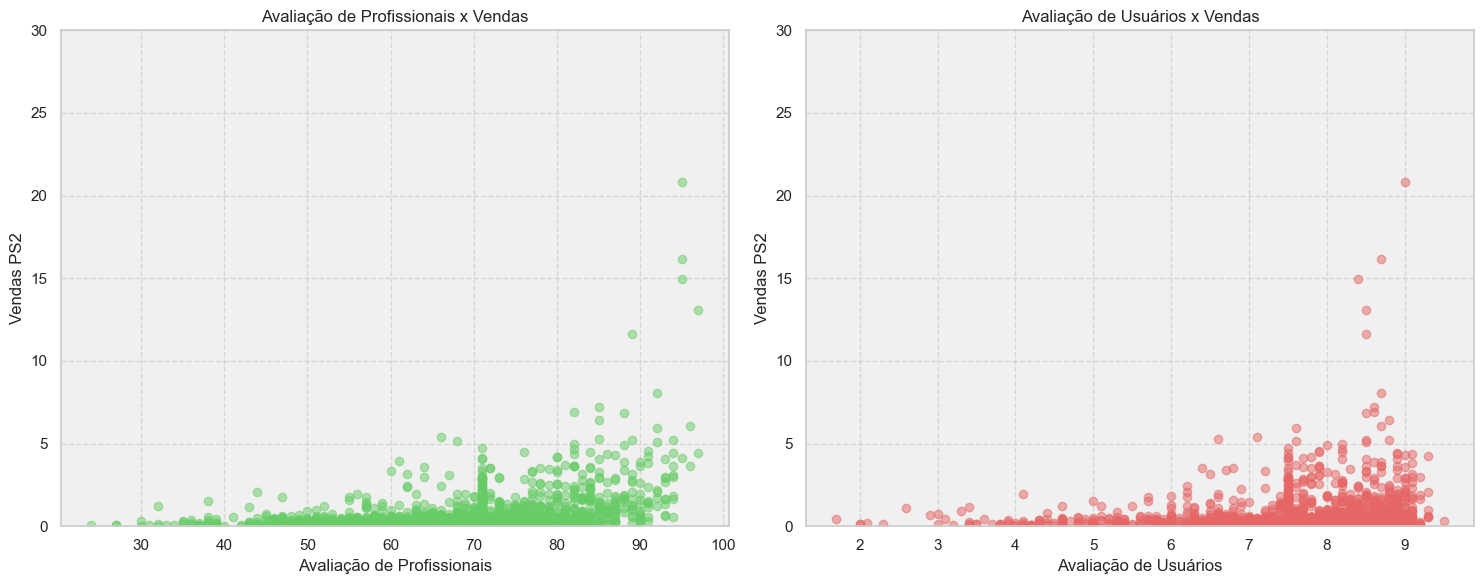

In [35]:
# Definir novas cores
new_colors = [(0.4, 0.8, 0.4), (0.9, 0.4, 0.4)]
# Criar figura e eixos
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Para cada eixo, plotar gráfico de dispersão
for i, (score_column, color) in enumerate(zip(['critic_score', 'user_score'], new_colors)):
    axs[i].scatter(df_ps2[score_column], df_ps2['total_sales'], color=color, alpha=0.5)
    axs[i].set_xlabel('Avaliação de Profissionais' if score_column == 'critic_score' else 'Avaliação de Usuários')
    axs[i].set_ylabel('Vendas PS2')
    axs[i].set_title('Avaliação de Profissionais x Vendas' if score_column == 'critic_score' else 'Avaliação de Usuários x Vendas')
    axs[i].set_ylim(0, 30)  # Definindo o intervalo do eixo y
    axs[i].grid(True, linestyle='--', alpha=0.7)  # Adicionar uma grade mais sutil
    axs[i].set_facecolor('#f0f0f0')  # Adicionar um fundo cinza claro

plt.tight_layout()
plt.show()

In [36]:
# Calcular a correlação entre a avaliação dos profissionais (critics) e as vendas totais
corr_critic_sales_jogos_outras = np.corrcoef(jogos_outras_plataformas['critic_score'], jogos_outras_plataformas['total_sales'])[0, 1]

# Calcular a correlação entre a avaliação dos usuários (users) e as vendas totais
corr_user_sales_jogos_outras = np.corrcoef(jogos_outras_plataformas['user_score'], jogos_outras_plataformas['total_sales'])[0, 1]

print("Correlação entre avaliação dos profissionais e vendas (outras plataformas):", corr_critic_sales_jogos_outras)
print("Correlação entre avaliação dos usuários e vendas (outras plataformas):", corr_user_sales_jogos_outras)

Correlação entre avaliação dos profissionais e vendas (outras plataformas): 0.24994726237486614
Correlação entre avaliação dos usuários e vendas (outras plataformas): 0.03975371627430622


**Análise**
* Assim como analisado anteriormente na plataforma PS2, a correlação de 0.2499 entre a avaliação dos profissionais e as vendas totais sugere que há uma relação moderadamente positiva entre essas duas variáveis para os jogos presentes em outras plataformas. Isso significa que, em geral, jogos com avaliações mais altas dos profissionais tendem a ter vendas um pouco maiores nessas outras plataformas, mas a relação não é extremamente forte.
* Por outro lado, a correlação de 0.0398 entre a avaliação dos usuários e as vendas totais indica uma relação muito fraca entre essas duas variáveis para os jogos presentes em outras plataformas. Isso sugere que as avaliações dos usuários têm uma influência muito pequena nas vendas totais dos jogos nessas outras plataformas.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A correlação entre avaliações e vendas das outras plataformas foi analisada
- As conclusões foram apresentadas
</div>


### Análise de Vendas por Gênero x Rating

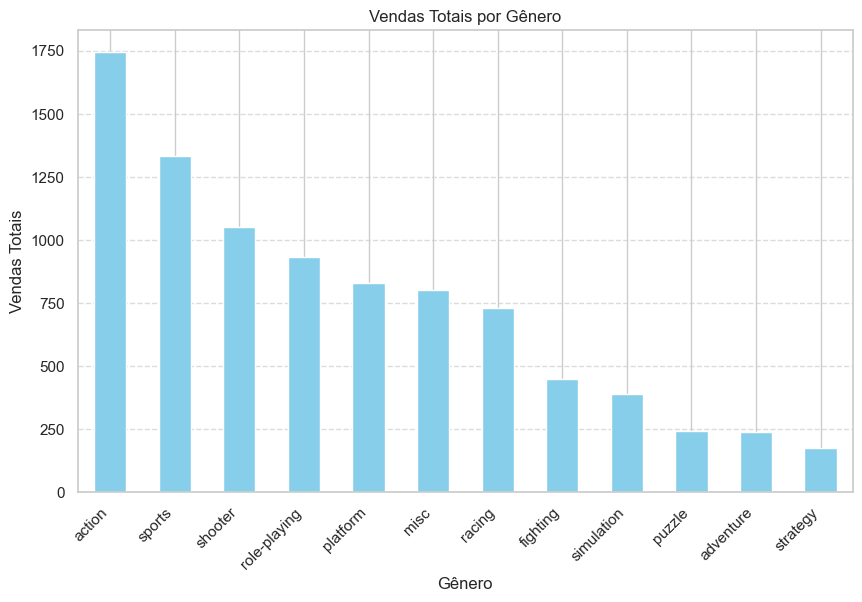

In [37]:
# Agrupar os dados por gênero e somar as vendas totais de cada gênero
sales_by_genre = df_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sales_by_genre.plot(kind='bar', color='skyblue')
plt.title('Vendas Totais por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

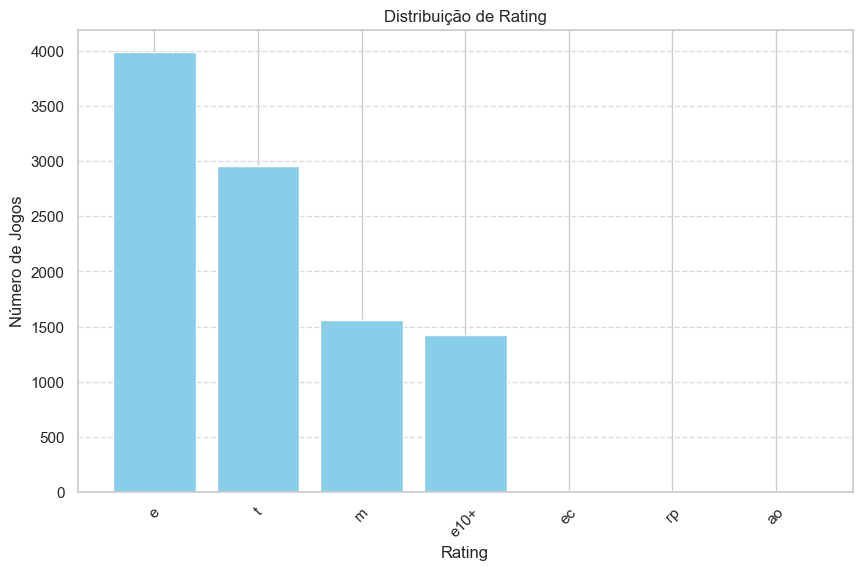

In [38]:
# Filtrar os dados para excluir os valores 'n/d' da coluna 'rating'
filtered_rating = df_games[df_games['rating'] != 'n/d']

# Contar a ocorrência de cada valor na coluna 'rating'
rating_counts = filtered_rating['rating'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
plt.title('Distribuição de Rating')
plt.xlabel('Rating')
plt.ylabel('Número de Jogos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Gêneros de vendas mais altas

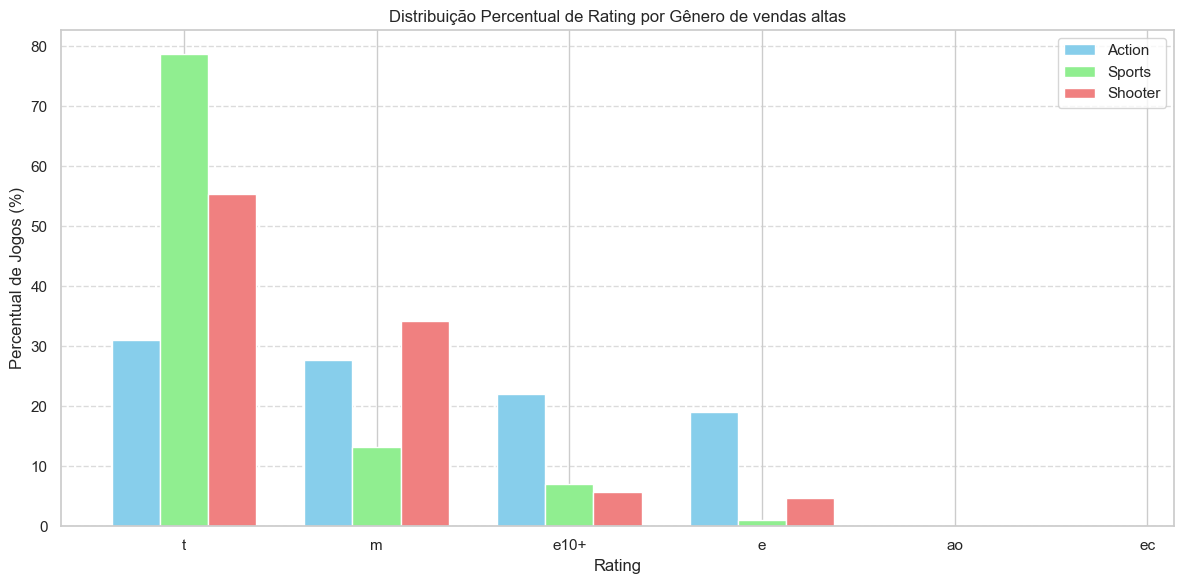

In [39]:
# Filtrar os dados para incluir apenas jogos do gênero 'action' excluindo 'n/d'
action_games = df_games[(df_games['genre'] == 'action') & (df_games['rating'] != 'n/d')]
action_rating_percent = (action_games['rating'].value_counts() / len(action_games)) * 100

# Filtrar os dados para incluir apenas jogos do gênero 'sports' excluindo 'n/d'
sports_games = df_games[(df_games['genre'] == 'sports') & (df_games['rating'] != 'n/d')]
sports_rating_percent = (sports_games['rating'].value_counts() / len(sports_games)) * 100

# Filtrar os dados para incluir apenas jogos do gênero 'shooter' excluindo 'n/d'
shooter_games = df_games[(df_games['genre'] == 'shooter') & (df_games['rating'] != 'n/d')]
shooter_rating_percent = (shooter_games['rating'].value_counts() / len(shooter_games)) * 100

# Criar o gráfico de barras com as distribuições percentuais dos três gêneros lado a lado
plt.figure(figsize=(12, 6))

# Gênero 'action'
plt.bar(action_rating_percent.index, action_rating_percent.values, color='skyblue', label='Action', width=0.25)

# Gênero 'sports'
plt.bar([x + 0.25 for x in range(len(sports_rating_percent))], sports_rating_percent.values, color='lightgreen', label='Sports', width=0.25)

# Gênero 'shooter'
plt.bar([x + 0.5 for x in range(len(shooter_rating_percent))], shooter_rating_percent.values, color='lightcoral', label='Shooter', width=0.25)

plt.title('Distribuição Percentual de Rating por Gênero de vendas altas')
plt.xlabel('Rating')
plt.ylabel('Percentual de Jogos (%)')
plt.xticks([x + 0.25 for x in range(len(action_rating_percent))], action_rating_percent.index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [40]:
genres_list = ['action', 'sports', 'shooter']
calculate_and_print_correlations_by_genres(df_games, genres_list)

Correlação entre 'total_sales' e cada item da coluna 'rating' (exceto 'n/d') para jogos do gênero 'action':
m: 0.19334182985798257
e: -0.013420614342706161
t: -0.01235798995313164
e10+: -0.022317705807820068
ao: 0.021696956555841692
ec: -0.0010186125595059627

Correlação entre 'total_sales' e cada item da coluna 'rating' (exceto 'n/d') para jogos do gênero 'sports':
e: 0.07022023299357813
e10+: -0.006796502913997135
t: -0.012833025143492592
m: -0.012820354047961927

Correlação entre 'total_sales' e cada item da coluna 'rating' (exceto 'n/d') para jogos do gênero 'shooter':
m: 0.1489158927507285
t: -0.07226811567290402
e10+: -0.05164244837540615
e: -0.07552310049102921



**Análise**

* Para o gênero 'action':

    A correlação é mais forte com a classificação 'M' (maduro), indicando que os jogos com essa classificação tendem a ter vendas mais altas.
    Outras classificações ('E', 'T', 'E10+', 'AO', 'EC') têm correlações próximas de zero, o que sugere que não há uma relação significativa entre essas classificações e as vendas de jogos de ação.
    

* Para o gênero 'sports':

    A correlação é mais forte com a classificação 'E' (para todos), indicando que os jogos com essa classificação têm uma relação mais positiva com as vendas.
    Outras classificações ('E10+', 'T', 'M') têm correlações próximas de zero, o que sugere que não há uma relação significativa entre essas classificações e as vendas de jogos de esportes.
    

* Para o gênero 'shooter':

    A correlação é mais forte com a classificação 'M' (maduro), indicando que os jogos com essa classificação tendem a ter vendas mais altas.
    Outras classificações ('T', 'E10+', 'E') têm correlações negativas, sugerindo que os jogos com essas classificações têm uma relação negativa com as vendas de jogos de tiro.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A análise das avaliações para gêneros em alta foi executada
- As conclusões foram apresentadas
</div>


#### Gêneros de Vendas mais Baixas

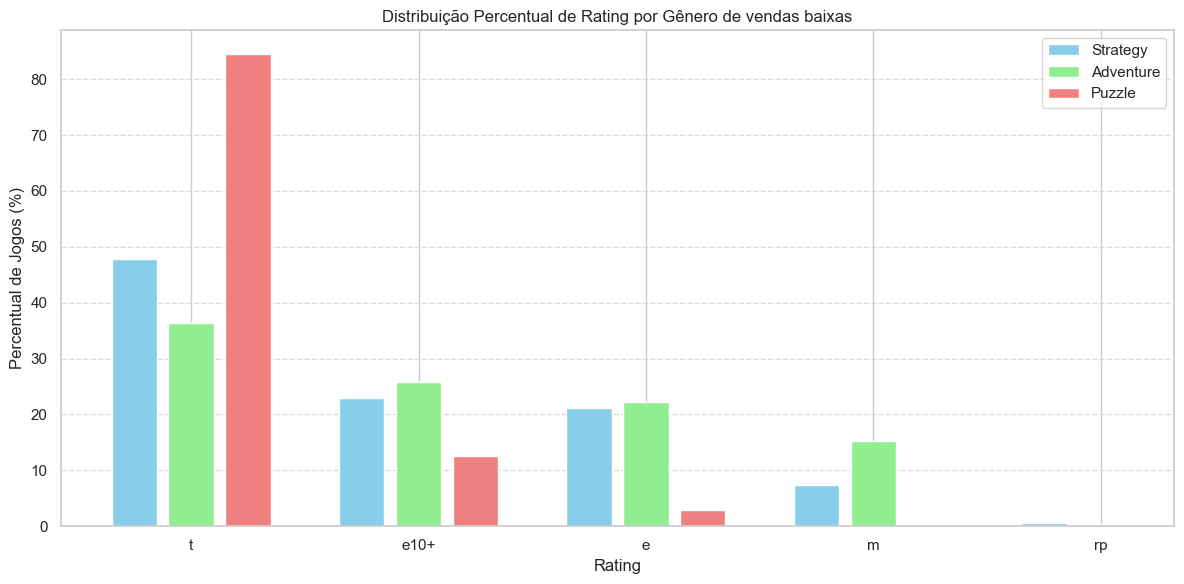

In [41]:
# Filtrar os dados para incluir apenas jogos dos gêneros 'strategy', 'adventure' e 'puzzle' excluindo 'n/d'
strategy_games = df_games[(df_games['genre'] == 'strategy') & (df_games['rating'] != 'n/d')]
strategy_rating_percent = (strategy_games['rating'].value_counts() / len(strategy_games)) * 100

adventure_games = df_games[(df_games['genre'] == 'adventure') & (df_games['rating'] != 'n/d')]
adventure_rating_percent = (adventure_games['rating'].value_counts() / len(adventure_games)) * 100

puzzle_games = df_games[(df_games['genre'] == 'puzzle') & (df_games['rating'] != 'n/d')]
puzzle_rating_percent = (puzzle_games['rating'].value_counts() / len(puzzle_games)) * 100

# Criar o gráfico de barras com as distribuições percentuais dos três gêneros lado a lado
plt.figure(figsize=(12, 6))

# Gênero 'strategy'
plt.bar(strategy_rating_percent.index, strategy_rating_percent.values, color='skyblue', label='Strategy', width=0.2)

# Gênero 'adventure'
plt.bar([x + 0.25 for x in range(len(adventure_rating_percent))], adventure_rating_percent.values, color='lightgreen', label='Adventure', width=0.2)

# Gênero 'puzzle'
plt.bar([x + 0.5 for x in range(len(puzzle_rating_percent))], puzzle_rating_percent.values, color='lightcoral', label='Puzzle', width=0.2)

plt.title('Distribuição Percentual de Rating por Gênero de vendas baixas')
plt.xlabel('Rating')
plt.ylabel('Percentual de Jogos (%)')
plt.xticks([x + 0.25 for x in range(len(strategy_rating_percent))], strategy_rating_percent.index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [42]:
genres_list = ['strategy', 'adventure', 'puzzle']
calculate_and_print_correlations_by_genres(df_games, genres_list)

Correlação entre 'total_sales' e cada item da coluna 'rating' (exceto 'n/d') para jogos do gênero 'strategy':
t: -0.049415765699792
e: 0.04424815909724255
e10+: -0.004947808186402548
m: -0.015144777167858519
rp: -0.02247630683948139

Correlação entre 'total_sales' e cada item da coluna 'rating' (exceto 'n/d') para jogos do gênero 'adventure':
m: 0.13742394895264276
e: 0.13054516283461728
t: -0.00909660850032554
e10+: -0.004542515961433699
ec: -0.000566192484856541

Correlação entre 'total_sales' e cada item da coluna 'rating' (exceto 'n/d') para jogos do gênero 'puzzle':
e: -0.07270966826854168
e10+: 0.018322081899313808
t: -0.014103501539444872



**Análise**

* Para o gênero 'strategy':

    A correlação mais significativa é negativa e está associada à classificação 'T' (adolescente), o que sugere que jogos de estratégia com essa classificação tendem a ter vendas mais baixas.
    As outras correlações ('E', 'E10+', 'M', 'RP') estão próximas de zero, o que indica que não há uma relação clara entre essas classificações e as vendas de jogos de estratégia.

* Para o gênero 'adventure':

    As correlações mais significativas estão associadas às classificações 'M' (maduro) e 'E' (para todos), ambas positivas. Isso sugere que jogos de aventura com essas classificações tendem a ter vendas mais altas.
    As correlações para 'T' (adolescente) e 'E10+' (maiores de 10 anos) estão próximas de zero, indicando que não há uma relação clara entre essas classificações e as vendas de jogos de aventura.
    A correlação para 'EC' (primeira infância) é próxima de zero, indicando uma relação mínima com as vendas de jogos de aventura.

* Para o gênero 'puzzle':

    A correlação mais significativa é negativa e está associada à classificação 'E' (para todos), o que sugere que jogos de quebra-cabeça com essa classificação tendem a ter vendas mais baixas.
    As correlações para 'E10+' (maiores de 10 anos) e 'T' (adolescente) estão próximas de zero, indicando que não há uma relação clara entre essas classificações e as vendas de jogos de quebra-cabeça.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A análise das avaliações para gêneros em baixa foi executada
- As conclusões foram apresentadas
</div>


***Conclusão ETAPA 3:***

Ao analisarmos os dados, fica evidente uma mudança significativa a partir da década de 1990 no cenário das plataformas de jogos eletrônicos. Plataformas que antes dominavam o mercado na década de 1980, como a '2600', eventualmente encerraram seu ciclo, cedendo espaço para o surgimento de novas tecnologias e plataformas mais avançadas.

Uma observação relevante é o surgimento e consolidação de um número crescente de plataformas ao longo do tempo, especialmente após a década de 1990. Esse fenômeno contribuiu para um aumento na competição e uma maior diversidade de opções para os jogadores. Consequentemente, o mercado tornou-se mais equilibrado, com várias plataformas disputando a atenção e os gastos dos consumidores.

Essa evolução do cenário das plataformas de jogos eletrônicos pode ser visualizada de forma clara ao analisarmos os gráficos década a década, destacando o dinamismo e as transformações que ocorreram ao longo do tempo, principalmente após do ano de 1995 que concentra mais de 95% dos lançamentos de jogos.

Na análise individual dos histogramas, observamos um padrão recorrente que sugere a existência de um ciclo médio de vida para as plataformas de jogos eletrônicos. Esse ciclo geralmente compreende um período de cerca de 10 anos, durante o qual uma plataforma surge, atinge seu auge de popularidade e vendas e, eventualmente, entra em declínio.

Uma exceção notável é observada nos lançamentos para 'PC', que se destacam por um padrão de crescimento mais linear e prolongado ao longo de aproximadamente 20 anos. Isso pode ser atribuído à natureza mais adaptável e em constante evolução dos computadores pessoais, que continuam a se manter relevantes no mercado de jogos ao longo do tempo.

Ao longo do período analisado, observamos que três grandes fabricantes exerceram domínio significativo no mercado global de jogos eletrônicos: Sony, Nintendo e Microsoft. Cada uma dessas empresas lançou pelo menos duas plataformas ao longo dos anos, evidenciando sua capacidade de adaptação às constantes mudanças e avanços tecnológicos no setor.

A necessidade de se manterem relevantes e competitivas em um mercado em constante evolução levou essas empresas a lançarem sucessivas plataformas, cada uma trazendo inovações e recursos aprimorados para os jogadores. Essa capacidade de acompanhar e se adaptar às tendências do mercado permitiu que a Sony, Nintendo e Microsoft se mantivessem como líderes do setor ao longo do tempo.

Ao analisar os diagramas de caixa e os valores representativos de média e mediana, é evidente uma disparidade significativa nas vendas, sugerindo uma ampla dispersão nos dados. Isso indica que os valores das vendas estão distribuídos por uma faixa considerável de valores.

As correlações entre a avaliação dos profissionais e as vendas totais e entre a avaliação dos usuários e as vendas totais para a plataforma 'ps2' por exemplo, indicam uma relação moderada e fraca, respectivamente.

Com base nessas correlações, podemos verificar que a avaliação dos profissionais parece ter uma relação ligeiramente mais forte com as vendas totais em comparação com a avaliação dos usuários. No entanto, ambas as relações são relativamente fracas, o que sugere que outros fatores além das avaliações podem influenciar as vendas de jogos.

As correlações entre a avaliação dos profissionais e as vendas totais e entre a avaliação dos usuários e as vendas totais  para os jogos presentes em outras plataformas (diferentes de 'ps2') indicam também uma relação moderada e fraca.

Sendo assim, podemos concluir que a avaliação dos profissionais parece ter uma relação mais forte com as vendas totais em comparação com a avaliação dos usuários para os jogos presentes em outras plataformas. Porém, ainda há outros fatores além das avaliações que podem influenciar significativamente as vendas de jogos nessas plataformas, e esses resultados devem ser interpretados com cautela.

Os três gêneros de maior sucesso de vendas no mercado têm a classificação 'M' (maduro) como a mais correlacionada com as vendas, o que sugere que os jogos com essa classificação podem ter um apelo mais amplo ou uma base de fãs mais dedicada, com maior liberdade financeira e um poder de compra maior, resultando em vendas mais altas. No entanto, as outras classificações não mostram uma relação clara com as vendas nos três gêneros. 

Com relação aos três gêneros de menores vendas, os gêneros 'strategy' e 'puzzle' se apresentam com as correlações de 'rating' não muito fortes, indicando que as vendas desses jogos podem não ser fortemente influenciadas pela classificação etária. Para o gênero 'adventure', as classificações 'M' e 'E' parecem ter uma relação mais positiva com as vendas, enquanto outras classificações têm uma correlação mais próxima de zero.

Em resumo, a análise dos dados revela que os gêneros de jogos com maiores vendas tendem a apresentar uma correlação significativa com faixas etárias específicas, sendo que a classificação "M" ("maduro") é comumente associada a esses gêneros. Por outro lado, os gêneros de jogos com vendas mais baixas não aparentam possuir uma relação clara com faixas etárias específicas.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Excelentes observações!
</div>


## Etapa 4 - Perfil de Usuário por Região:

### Análise de plataformas

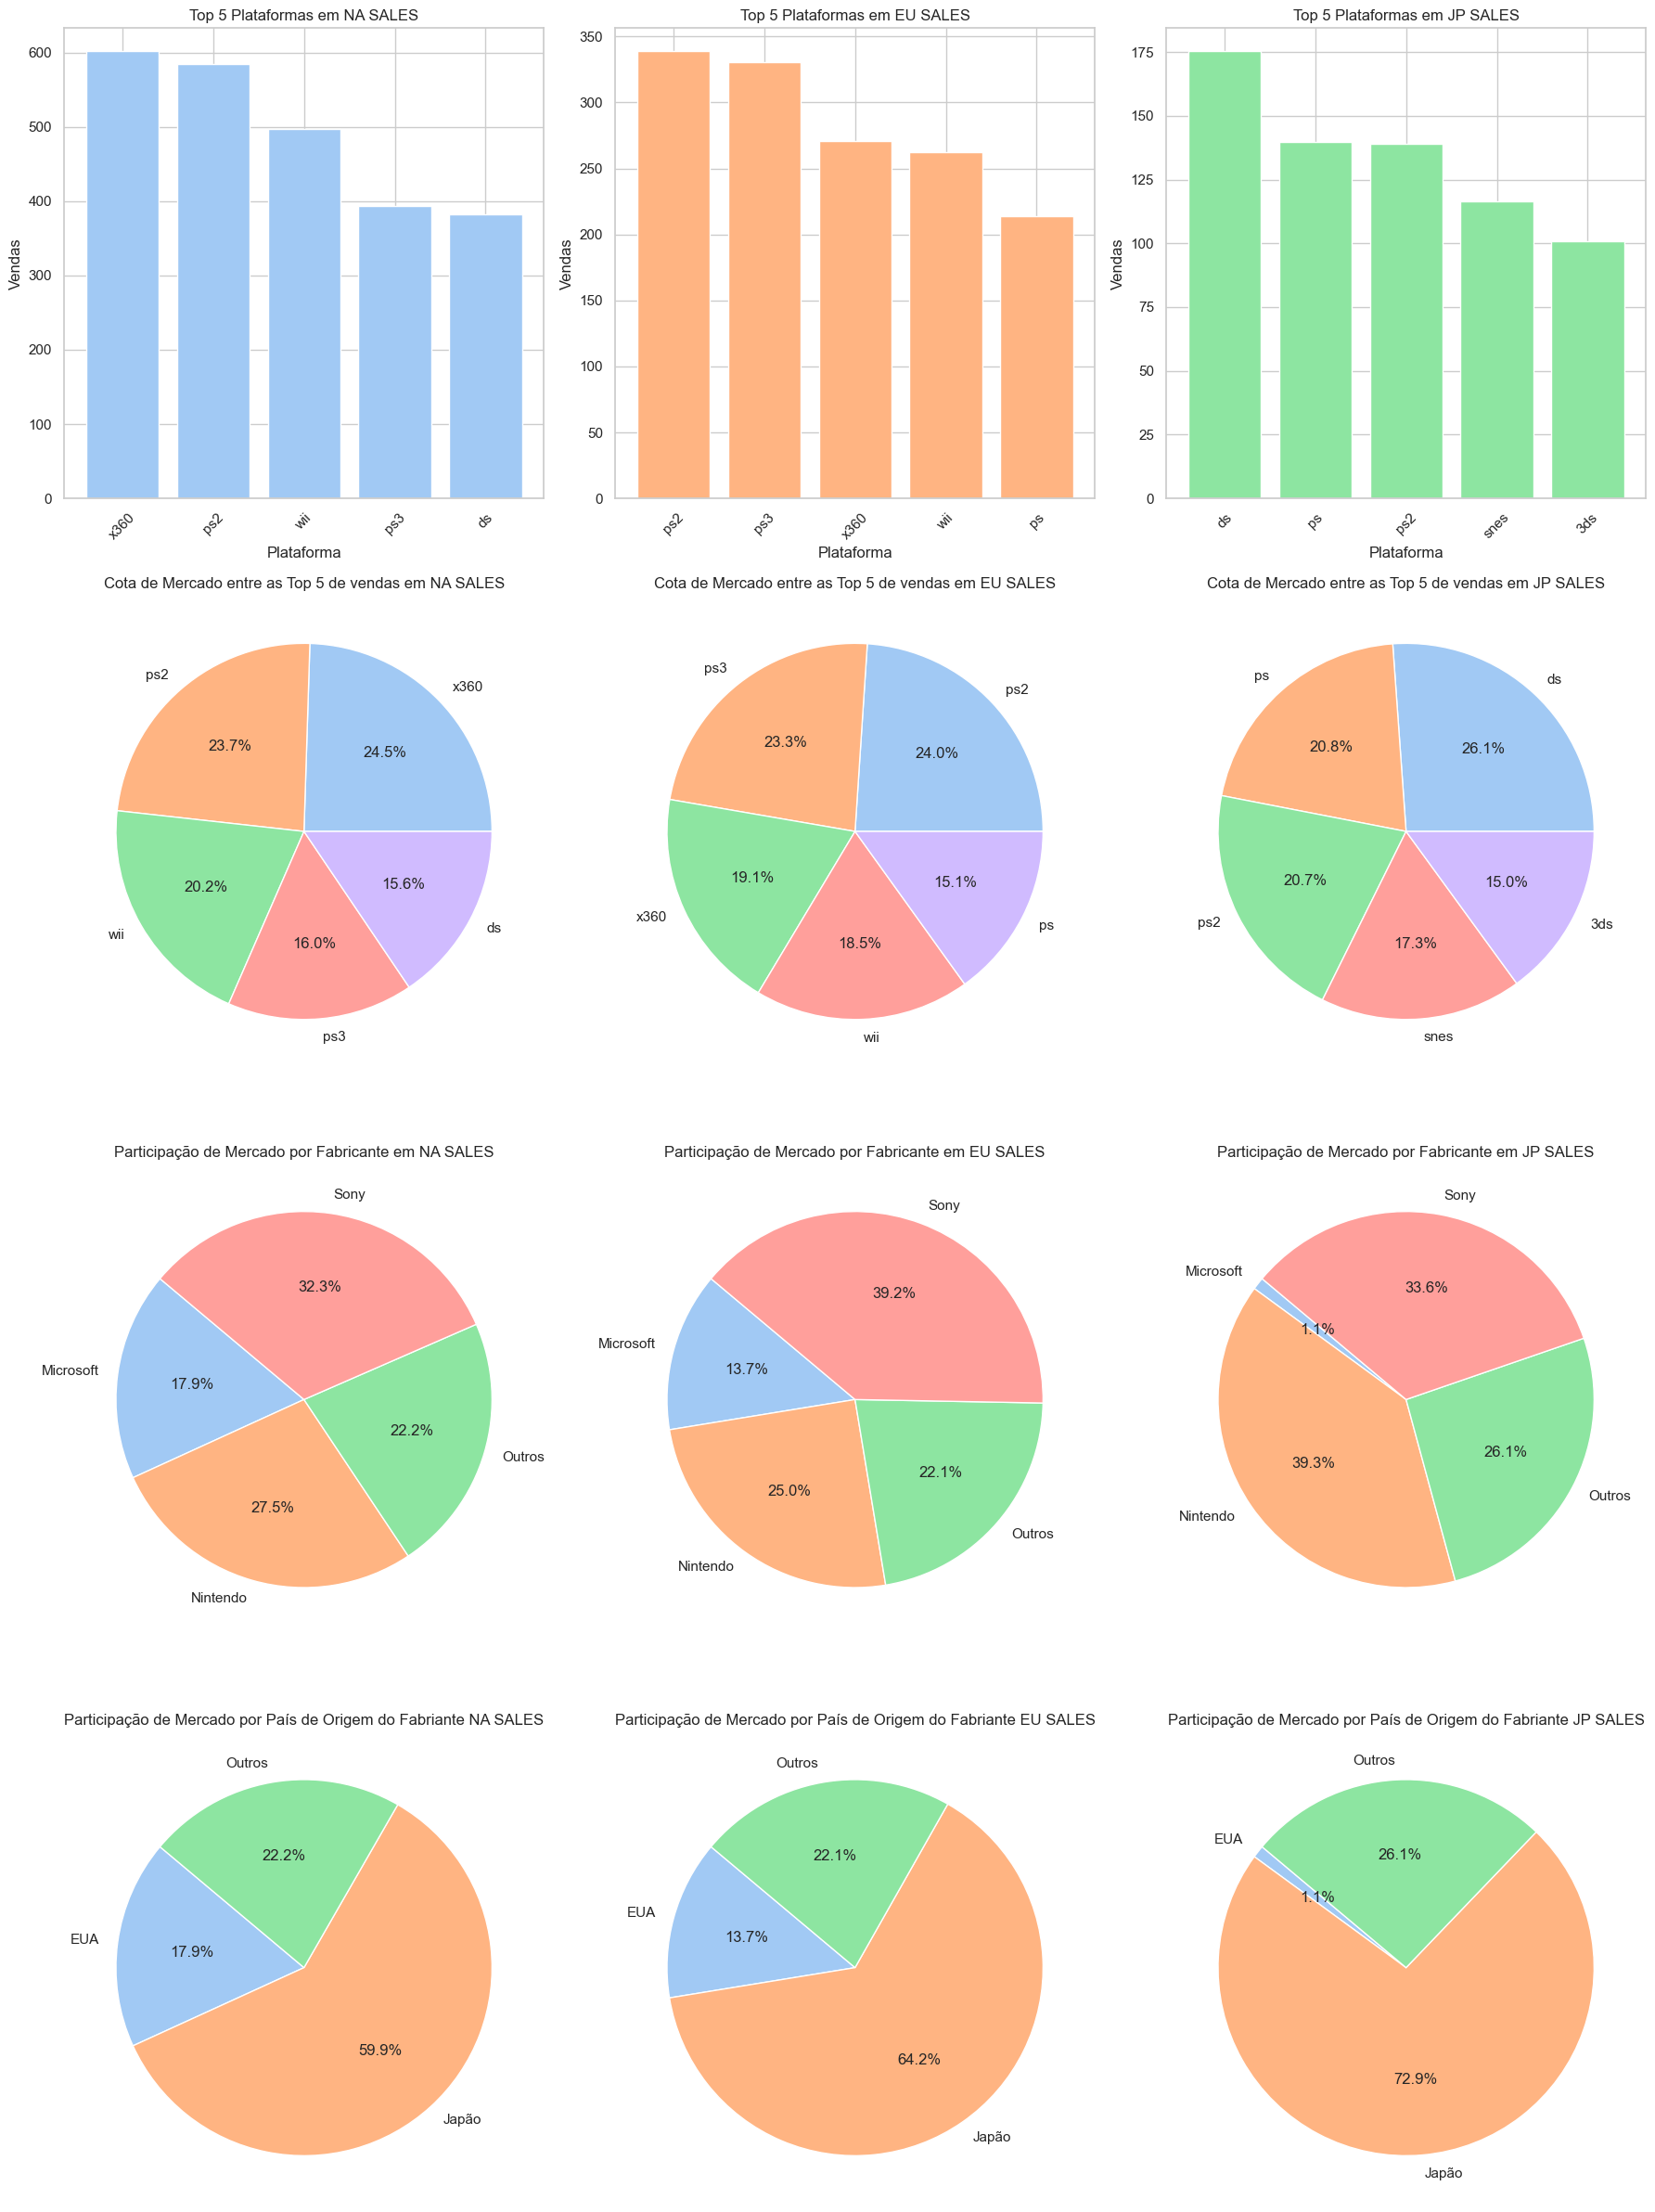

In [43]:
# Lista de regiões 
valid_sales_regions = ['na_sales', 'eu_sales', 'jp_sales']

generate_and_plot_sales_data(df_games, valid_sales_regions)

**Análise**

Podemos observar nos gráficos acima que a plataforma Xbox 360 da Microsoft lidera o mercado de vendas na América do Norte, com uma pequena vantagem sobre o PlayStation 2 (que lidera globalmente). No entanto, ao analisarmos por fabricante, notamos que, apesar de ter apenas uma plataforma entre as cinco mais vendidas e não ser a líder em vendas totais, a Microsoft tem uma parcela significativa no mercado norte-americano, sendo responsável por 19,7% das vendas.

O mercado europeu apresenta um equilíbrio de vendas entre as plataformas, com uma participação significativa da Microsoft, que compete de perto com as plataformas PlayStation 2 e PlayStation 3 nas vendas. No entanto, as fabricantes japonesas ainda representam mais de 60% do market share europeu.

Por fim, ao analisarmos as vendas no Japão, observamos que mais de 70% das vendas são de empresas de origem no próprio país, com uma participação quase irrelevante da Microsoft neste mercado.

### Análise de gêneros

Tabela de Percentual de Vendas na NA_SALES:
            Gênero  Percentual de Vendas
genre                                   
action      action             19.974912
sports      sports             15.553212
shooter    shooter             13.458257
platform  platform             10.123689
misc          misc              9.254937

Tabela de Percentual de Vendas na EU_SALES:
          Gênero  Percentual de Vendas
genre                                 
action    action             21.415017
sports    sports             15.543244
shooter  shooter             13.090828
racing    racing              9.756450
misc        misc              8.775896

Tabela de Percentual de Vendas na JP_SALES:
                    Gênero  Percentual de Vendas
genre                                           
role-playing  role-playing             27.395286
action              action             12.443153
sports              sports             10.447531
platform          platform             10.084481
misc        

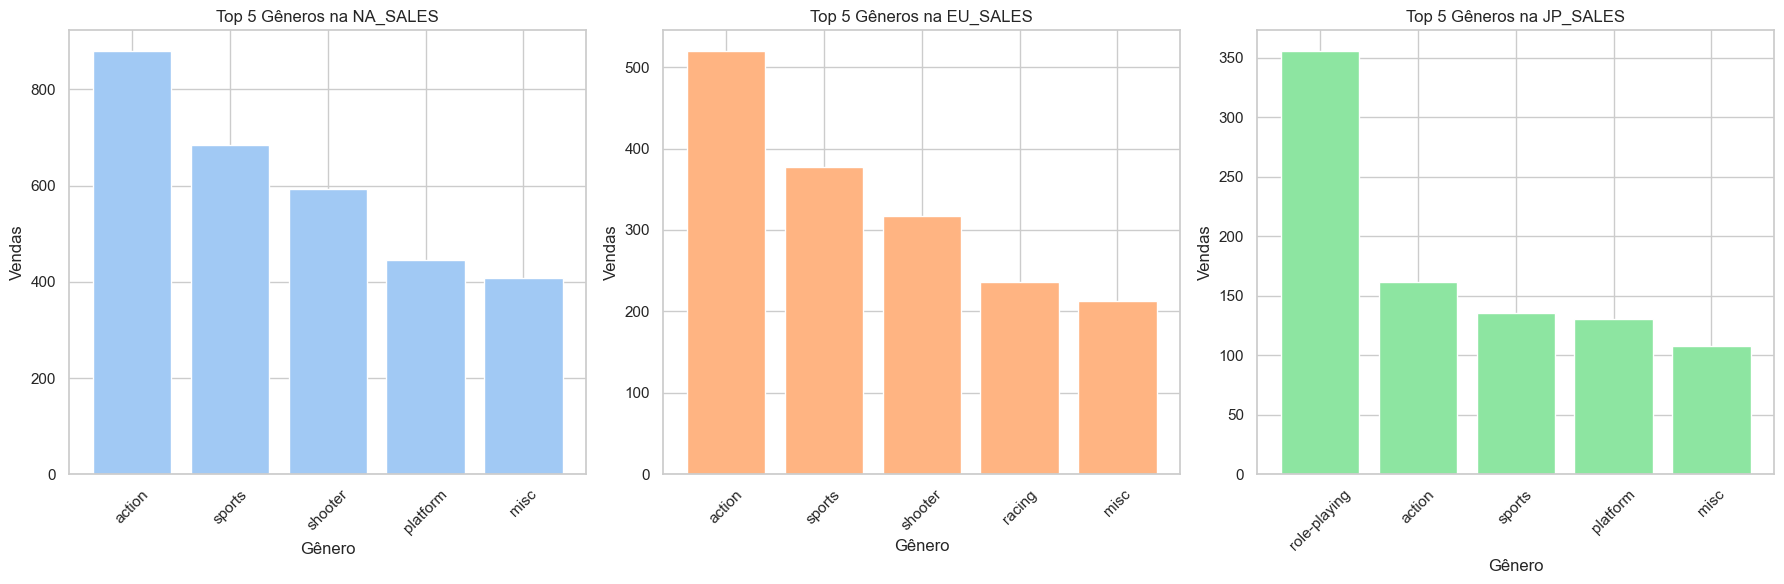

In [44]:
# Utilizando a função para criar os gráficos de barras
top_genres_by_region(df_games, 'genre', valid_sales_regions)

**Análise**

* América do Norte (NA Sales):

    O gênero "Action" lidera as vendas, representando aproximadamente 20% do total de vendas na região."Sports" e "Shooter" também são gêneros populares, com participações significativas de vendas. Os gêneros "Platform" e "Misc" também têm uma participação considerável, representando cerca de 10% das vendas cada.
    

* Europa (EU Sales):

    Observamos um padrão semelhante ao da América do Norte, com "Action" liderando as vendas, representando cerca de 21% do total de vendas na região. "Sports" e "Shooter" também são populares na Europa, com participações semelhantes às da América do Norte. "Racing" e "Misc" também têm participações significativas nas vendas, com cerca de 10% cada.
    

* Japão (JP Sales):
        
    O cenário é bastante diferente no Japão, onde o gênero "Role-Playing" domina as vendas, representando impressionantes 27% do total de vendas na região. "Action" e "Sports" também têm presença considerável, mas em uma escala menor em comparação com os gêneros ocidentais. Gêneros como "Platform" e "Misc" também têm participações significativas, mas em menor medida do que os gêneros mais orientados para RPG.

Tabela de Percentual de Vendas na NA_SALES:
       Rating  Percentual de Vendas
rating                             
e           e             40.999845
t           t             24.043558
m           m             23.686900
e10+     e10+             11.181402
ec         ec              0.048419

Tabela de Percentual de Vendas na EU_SALES:
       Rating  Percentual de Vendas
rating                             
e           e             39.237039
m           m             26.726271
t           t             23.581874
e10+     e10+             10.410638
ao         ao              0.033686

Tabela de Percentual de Vendas na JP_SALES:
       Rating  Percentual de Vendas
rating                             
e           e             43.822050
t           t             33.244768
m           m             14.105970
e10+     e10+              8.827211
ao         ao              0.000000



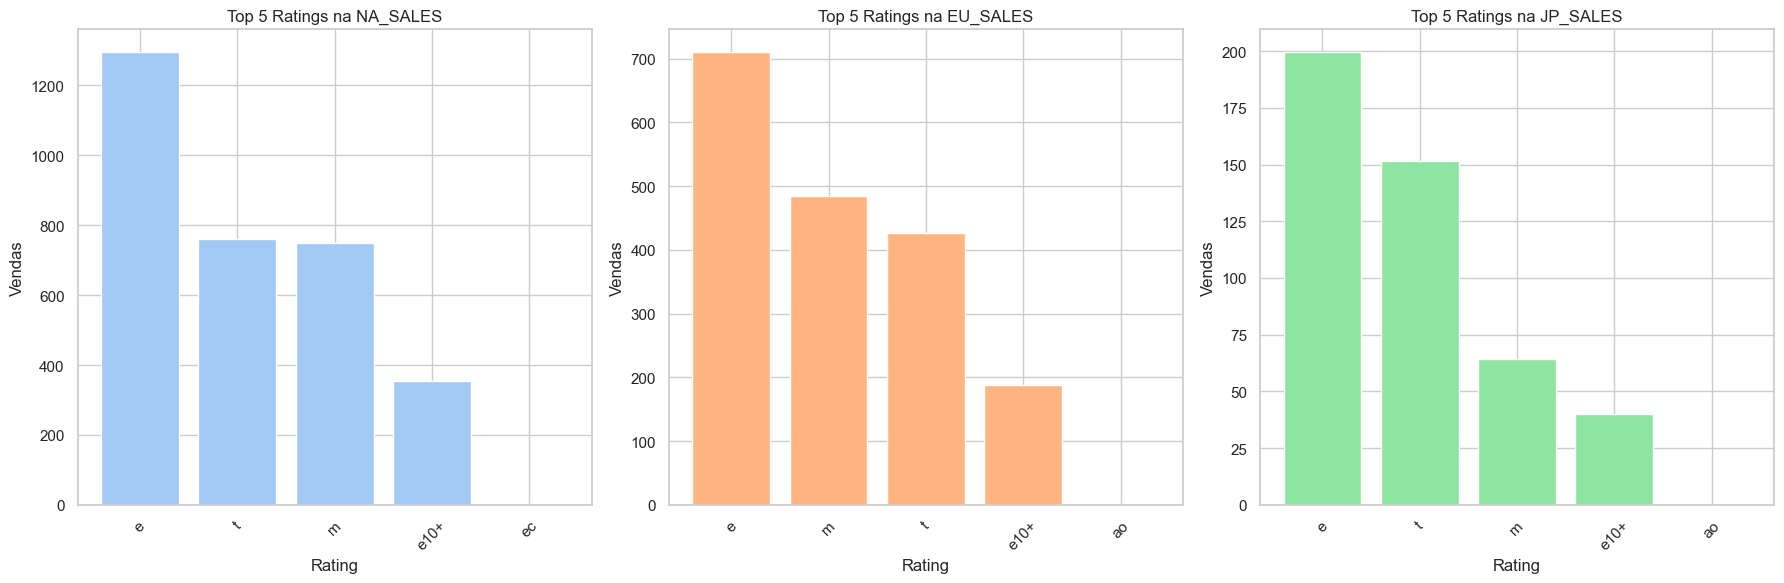

In [45]:
# Utilizando a função para criar os gráficos de barras e tabelas percentuais para ratings
top_ratings_by_region(df_games, 'rating', valid_sales_regions)

**Análise**

* América do Norte (NA_SALES):

    A classificação "E" (Everyone) representa a maior parcela de vendas, com aproximadamente 41% do mercado.
    Em seguida, temos as classificações "T" (Teen) e "M" (Mature), com cerca de 24% e 24%, respectivamente.
    A classificação "E10+" (Everyone 10 and older) tem uma participação menor, com cerca de 11% do mercado.
    A classificação "EC" (Early Childhood) representa uma parcela muito pequena do mercado, com menos de 0.1%.
    

* Europa (EU_SALES):

    A classificação "E" também é a líder de vendas na Europa, com cerca de 39% do mercado.
    A classificação "M" ocupa o segundo lugar, com aproximadamente 27% do mercado.
    A classificação "T" segue logo atrás, com cerca de 24% do mercado.
    A classificação "E10+" representa cerca de 10% do mercado, enquanto "AO" (Adults Only) tem uma participação muito pequena.


* Japão (JP_SALES):

    No Japão, a classificação "E" continua sendo a líder de vendas, com aproximadamente 44% do mercado.
    A classificação "T" tem uma participação significativa, com cerca de 33% do mercado.
    A classificação "M" tem uma parcela menor do mercado em comparação com as outras regiões, com cerca de 14%.
    A classificação "E10+" tem uma participação similar à da América do Norte, com cerca de 9%.
    A classificação "AO" não tem presença nas vendas do mercado japonês.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O perfil de usuários para cada região foi criado
- As estatísticas foram calculadas
</div>

***Conclusão ETAPA 4:***

Com base nas análises dos mercados de videogames na América do Norte, Europa e Japão, algumas conclusões podem ser destacadas:

   Liderança da Microsoft na América do Norte: A plataforma Xbox 360 da Microsoft lidera as vendas na América do Norte, mostrando uma forte presença da empresa nesse mercado. Apesar de não ter a maior participação de mercado em termos totais, a Microsoft ainda tem uma fatia significativa nas vendas, indicando uma competição acirrada com as outras fabricantes.

   Equilíbrio no mercado europeu: No mercado europeu, há um equilíbrio entre as plataformas, com uma competição intensa entre as empresas. A presença da Microsoft é notável, rivalizando de perto com as fabricantes japonesas, que ainda mantêm uma posição dominante, representando a maior parte das vendas na região.

   Domínio das fabricantes japonesas no Japão: O mercado japonês é fortemente dominado pelas empresas de origem japonesa, com mais de 70% das vendas provenientes dessas fabricantes. A presença da Microsoft é mínima neste mercado, indicando uma preferência local por produtos domésticos.

Essa análise sugere também que as preferências dos jogadores variam consideravelmente entre diferentes regiões. Enquanto os gêneros de ação e esportes são populares em regiões ocidentais como América do Norte e Europa, o Japão tem uma preferência muito mais forte por jogos de RPG. Essas diferenças podem ser influenciadas por uma variedade de fatores, incluindo cultura, tradições de jogos e preferências de público-alvo.

Em geral, podemos observar que a classificação "E" é a mais popular em todas as regiões, o que indica uma preferência generalizada por jogos adequados para todas as idades. As classificações "T" e "M" também são populares, embora variem em importância dependendo da região. Por outro lado, as classificações menos comuns, como "EC" e "AO", têm uma presença muito limitada nas vendas globais de jogos.

Em suma, essas análises ressaltam a importância da compreensão das preferências regionais e da concorrência no setor de videogames, destacando como diferentes empresas conseguem competir e se posicionar em mercados distintos.




## Etapa 5 - Testes de Hipóteses:

### Classificação de Usuários: Xbox One x PC (Plataformas)

* Formulação das Hipóteses:

   Hipótese Nula (H0): As médias das classificações dos usuários ('user_score') para as plataformas 'xb' e 'pc' são iguais.
   
   Hipótese Alternativa (H1): As médias das classificações dos usuários ('user_score') para as plataformas 'xb' e 'pc' são diferentes.
   

* Seleção do Nível de Significância (α):

   Vamos selecionar um nível de significância de 0.05, o que significa que estamos dispostos a aceitar uma probabilidade de 5% de cometer um erro. (rejeitar a hipótese nula quando ela é verdadeira).
   

* Coleta dos Dados:

   Filtrar o DataFrame df_games para obter as classificações dos usuários ('user_score') para as plataformas 'xb' e 'pc'.


* Teste de Hipótese:

   Calcular as médias das classificações dos usuários para cada plataforma.
   Realizar o teste t de Student para determinar se há uma diferença significativa entre as médias.
   Interpretar o valor p do teste.

In [46]:
# Filtrar o DataFrame para obter as classificações dos usuários para as plataformas 'xb' e 'pc'
user_scores_xb = df_games[df_games['platform'] == 'xb']['user_score'].dropna()
user_scores_pc = df_games[df_games['platform'] == 'pc']['user_score'].dropna()

# Teste de hipótese utilizando o teste t de Student para duas amostras independentes
t_statistic, p_value = ttest_ind(user_scores_xb, user_scores_pc)

# Nível de significância
alpha = 0.05

# Exibir os resultados do teste
print("Estatística do teste t:", t_statistic)
print(f"Valor p do teste: {p_value}")

Estatística do teste t: 5.511178421368027
Valor p do teste: 4.0806351204360004e-08


**Análise**

O valor p do teste de hipótese é extremamente baixo, aproximadamente 4.08e-08 (ou seja, 0.00000004080635). Isso significa que a probabilidade de observar uma diferença nas médias das classificações dos usuários para as plataformas 'xb' e 'pc' tão extremas quanto as observadas nos dados, assumindo que as médias são realmente iguais, é extremamente baixa.

Com base nesse valor p muito baixo, rejeitamos a hipótese nula, que afirmava que as médias das classificações dos usuários para as plataformas 'xb' e 'pc' são iguais. Portanto, há evidências estatísticas significativas para concluir que as médias das classificações dos usuários para essas duas plataformas são diferentes.

Essa conclusão sugere que as médias das classificações dos usuários para as plataformas 'xb' e 'pc' não são estatisticamente equivalentes, o que pode indicar diferenças na satisfação dos usuários ou na popularidade entre essas duas plataformas.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- As hipóteses nula e alternativa foram definidas
- O valor de alpha foi definido
- O teste estatístico foi conduzido corretamente
- O resultado foi analisado a partir do calculo de significância do teste (`p-valor`)
</div>

### Classificação de Usuários: Action x Sports (Gêneros)

* Formulação das Hipóteses:

    Hipótese nula (H0): A classificação média dos usuários para os itens 'action' e 'sports' é igual.
    
    Hipótese alternativa (H1): A classificação média dos usuários para os itens 'action' e 'sports' é diferente.
    

* Coleta de Dados:

    Coletar os dados relevantes das plataformas ('genre') para os itens 'action' e 'sports' e suas respectivas classificações médias dos usuários ('user_score').
    

* Escolha do Teste Estatístico:

    Como estamos comparando as médias de duas amostras independentes, utilizaremos um teste t-teste de Student.
    
    
* Definição do Nível de Significância:

    Nível de significância (alfa) para teste foi definido em 0,05 (ou 5%).

In [47]:
# Filtrando os dados para 'action' e 'sports'
action_scores = df_games[df_games['genre'] == 'action']['user_score']
sports_scores = df_games[df_games['genre'] == 'sports']['user_score']

# Realizando o teste t de Student para duas amostras independentes
t_statistic, p_value = ttest_ind(action_scores, sports_scores, equal_var=False)  # equal_var=False indica que as variâncias não são assumidas iguais

# Definindo o nível de significância
alpha = 0.05

# Imprimindo os resultados
print("Estatística do teste t:", t_statistic)
print("Valor-p:", p_value)

Estatística do teste t: 0.3639477704499268
Valor-p: 0.7159128316394157


**Análise**

Com base nos resultados do teste não temos evidências suficientes para rejeitar a hipótese nula. Não podemos afirmar que há uma diferença estatisticamente significativa nas classificações médias dos usuários entre os gêneros 'action' e 'sports' no conjunto de dados fornecido.

Essa interpretação sugere que, no conjunto de dados analisado, não há uma diferença estatisticamente significativa nas classificações médias dos usuários entre os gêneros 'action' e 'sports'.

***Conclusão ETAPA 5:***

* Plataformas 'xb' e 'pc':

    O valor-p extremamente baixo (aproximadamente 4.08e-08) indica que há evidências estatísticas significativas para rejeitar a hipótese nula. Portanto, podemos concluir que as médias das classificações dos usuários para as plataformas 'xb' e 'pc' são diferentes.
    Essa conclusão sugere que as plataformas 'xb' e 'pc' têm diferenças estatisticamente significativas nas classificações médias dos usuários, o que pode indicar divergências na satisfação dos usuários ou na popularidade entre essas duas plataformas.


* Gêneros 'action' e 'sports':

    Apesar de uma estatística de teste t relativamente baixa (0.364), o valor-p consideravelmente alto (0.716) sugere que não há evidências suficientes para rejeitar a hipótese nula. Portanto, não podemos concluir que há uma diferença estatisticamente significativa nas classificações médias dos usuários entre os gêneros 'action' e 'sports'.
    
    
    
Em resumo, enquanto encontramos diferenças estatisticamente significativas nas classificações médias dos usuários entre as plataformas 'xb' e 'pc', não podemos afirmar o mesmo para os gêneros 'action' e 'sports' com base nos dados analisados. Essas conclusões podem fornecer insights úteis sobre as preferências e satisfação dos usuários em relação às plataformas de videogame e aos diferentes gêneros de jogos.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- As hipóteses nula e alternativa foram definidas
- O valor de alpha foi definido
- O teste estatístico foi conduzido corretamente
- O resultado foi analisado a partir do calculo de significância do teste (`p-valor`)
</div>

## Etapa 6 - Conclusão Geral:

**Sobre os Dados:**

Durante a preparação dos dados, uma série de etapas foram realizadas para garantir que os dados estivessem limpos, organizados e prontos para análise.

Para começar, todos os nomes das colunas foram convertidos para minúsculas. Essa padronização na nomenclatura das colunas torna mais fácil e consistente o acesso aos dados.Além disso, todos os dados de texto foram convertidos para minúsculas. Isso foi feito para evitar duplicatas devido a diferenças de maiúsculas e minúsculas, garantindo uma análise mais precisa e completa dos dados.Após a conversão para minúsculas, foi realizada uma verificação para identificar e lidar com possíveis dados duplicados no dataframe. Isso foi feito para garantir a integridade dos dados e evitar redundâncias que poderiam distorcer os resultados da análise.

Em seguida, foram verificados os valores nulos em todas as colunas do dataframe. Os dados nulos da coluna 'Year_of_Release' foram tratados e convertidos para o tipo de dados inteiros, representando os anos de lançamento dos jogos. Da mesma forma, os dados nulos da coluna 'User_score' foram tratados e convertidos para o tipo de dados float, permitindo seu uso em cálculos numéricos.
Os dados nulos das colunas 'Critic_Score', 'Rating' e 'Name' foram tratados de acordo com a necessidade específica de cada coluna, utilizando técnicas adequadas para garantir a integridade dos dados.

Por fim, o rating ESRB (Entertainment Software Rating Board) foi padronizado para garantir consistência nos dados, simplificando a análise e a comparação entre os jogos com diferentes classificações.

Essas ações visam garantir que os dados estejam organizados e livres de inconsistências, possibilitando uma análise mais precisa.


**Analisando os Dados:**

A análise dos dados revela uma evolução dinâmica no cenário das plataformas de jogos eletrônicos ao longo das décadas, com mudanças significativas ocorrendo a partir da década de 1990. Plataformas que dominaram o mercado na década de 1980 foram substituídas por tecnologias mais avançadas, refletindo um ciclo de vida típico para essas plataformas.

Observamos um aumento na competição e diversidade de opções para os jogadores, com o surgimento de várias plataformas novas após a década de 1990. Esse crescimento contribuiu para um mercado mais equilibrado, onde várias plataformas disputam a atenção e os gastos dos consumidores.

Os histogramas evidenciam padrões recorrentes sugerindo um ciclo médio de vida para as plataformas de jogos eletrônicos, geralmente em torno de 10 anos, com exceção notável para os lançamentos para 'PC', que mostram um padrão de crescimento mais linear e prolongado ao longo de aproximadamente 20 anos.

A análise também destaca a dominação das três grandes fabricantes de consoles de videogame: Sony, Nintendo e Microsoft. Essas empresas lançaram sucessivas plataformas ao longo dos anos, demonstrando sua capacidade de adaptação às mudanças e avanços tecnológicos no setor.

Em relação às vendas de jogos, observamos uma ampla dispersão nos dados, indicando uma variedade considerável nos valores das vendas. As correlações entre as avaliações dos profissionais e dos usuários com as vendas totais sugerem uma relação moderada a fraca, indicando que outros fatores além das avaliações influenciam as vendas de jogos.

Os gêneros de maior sucesso de vendas tendem a estar associados à classificação etária 'M' ('maduro'), enquanto os gêneros de menor sucesso não apresentam uma relação clara com faixas etárias específicas.

Em resumo, a análise dos dados mostra a complexidade e dinâmica do mercado de jogos eletrônicos, destacando a importância da adaptação às mudanças tecnológicas, a diversificação das opções para os jogadores e a influência de múltiplos fatores nas vendas de jogos. Esses dados fornecem uma ideia para entender as tendências e tomar decisões estratégicas no setor de jogos eletrônicos.


**Sobre Perfil de Usuários por região:**

Com base nas análises dos mercados de videogames na América do Norte, Europa e Japão, algumas conclusões claras emergem, evidenciando as dinâmicas regionais e as estratégias das empresas no setor.

Primeiramente, a liderança da Microsoft na América do Norte, com sua plataforma Xbox 360, demonstra sua forte presença nesse mercado, apesar da competição acirrada com outras fabricantes. Esse cenário indica um ambiente altamente competitivo, onde a Microsoft mantém uma fatia significativa das vendas.

No mercado europeu, observamos um equilíbrio entre as plataformas, com uma competição intensa entre as empresas. A Microsoft rivaliza de perto com as fabricantes japonesas, que continuam a dominar a região em termos de participação nas vendas.

Por outro lado, o mercado japonês é fortemente dominado pelas empresas de origem japonesa, com uma preferência local evidente por produtos domésticos. A presença mínima da Microsoft nesse mercado destaca essa preferência, demonstrando a importância da compreensão das especificidades culturais e do comportamento do consumidor em cada região.

Além disso, as análises revelam diferenças significativas nas preferências dos jogadores entre as regiões. Enquanto os gêneros de ação e esportes são populares na América do Norte e Europa, o Japão tem uma preferência mais forte por jogos de RPG. Essas divergências refletem uma variedade de fatores, incluindo cultura, tradições de jogos e preferências do público-alvo.

A prevalência da classificação "E" (para todos) em todas as regiões sugere uma preferência generalizada por jogos adequados para todas as idades. As classificações "T" (adolescentes) e "M" (mature) também são populares, embora sua importância varie dependendo da região. Por outro lado, as classificações menos comuns, como "EC" (early childhood) e "AO" (adults only), têm uma presença muito limitada nas vendas globais de jogos.

Em resumo, essas análises destacam a importância da compreensão das preferências regionais e da concorrência no setor de videogames. Elas demonstram como diferentes empresas conseguem competir e se posicionar de forma estratégica em mercados distintos, enfatizando a necessidade de adaptação às nuances culturais e preferências dos consumidores em cada região.

**Testando Hipóteses:**

Com base nos resultados dos testes de hipótese realizados para as plataformas 'xb' e 'pc', bem como para os gêneros 'action' e 'sports', podemos chegar a algumas conclusões importantes.

Primeiramente, para as plataformas 'xb' (Xbox) e 'pc' (computador pessoal), encontramos evidências estatísticas significativas que nos levam a rejeitar a hipótese nula. Isso sugere que as médias das classificações dos usuários para essas duas plataformas são diferentes. Essa diferença estatisticamente significativa pode indicar divergências na satisfação dos usuários ou na popularidade entre as plataformas, destacando a importância de considerar as preferências e experiências dos jogadores ao escolherem entre essas opções de jogo.

Por outro lado, para os gêneros 'action' e 'sports', não encontramos evidências suficientes para rejeitar a hipótese nula. Isso significa que não podemos concluir que há uma diferença estatisticamente significativa nas classificações médias dos usuários entre esses dois gêneros. Essa falta de diferença estatisticamente significativa sugere que, com base nos dados analisados, os usuários não têm uma preferência clara entre os gêneros 'action' e 'sports' em termos de classificações médias.

Em resumo, enquanto as diferenças nas classificações médias dos usuários entre as plataformas 'xb' e 'pc' são estatisticamente significativas, não podemos fazer a mesma afirmação para os gêneros 'action' e 'sports'. Essas conclusões destacam a importância de compreender as nuances das preferências dos usuários e fornecem insights valiosos sobre as dinâmicas do mercado de videogames, auxiliando na tomada de decisões estratégicas relacionadas a plataformas e gêneros de jogos.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Excelente conclusão geral do projeto, muito bem detalhada e passando pelos principais pontos desenvolvidos ao longo da análise.
</div>